# Task
Analyze a data using six different machine learning models such as logistic regression, random forest, support vector machine, extreme gradient boosting , naive bayes classifier and k- nearest neighbors. and it is important to check the feature importance and also the models performances using the ACCURACY, Sensitivity, Specificity, F1 score and Precision. kindly do further analysis and visualization

the model to use is "sphus_new ~ chronicw9_new + adl2_new + iadl2_new + eurod_new + isced1997_r_new"



In [1]:
#from google.colab import drive #<- the import was commented out, making 'drive' undefined
from google.colab import drive #<- uncomment this line to import 'drive' from google.colab

drive.mount('/content/drive')

# Correct way to read the CSV file
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/data_female.csv') # Assuming this is the path where you saved the file in the previous cell
display(df.head())
print(df.shape) # Changed df to data_final to print the shape of the correct DataFrame

Mounted at /content/drive


country  gender  age_int partnerinhh country_new    sphus_new  \
0  Austria  Female       70         Yes     Austria  Good health   
1  Austria  Female       81          No     Austria  Poor health   
2  Austria  Female       86         Yes     Austria  Good health   
3  Austria  Female       70          No     Austria  Good health   
4  Austria  Female       55         Yes     Austria  Good health   

        chronicw9_new        adl2_new       iadl2_new      eurod_new  \
0     Chronic disease  No limitations  No limitations  Not depressed   
1     Chronic disease  No limitations  No limitations  Not depressed   
2  No chronic disease  No limitations  No limitations      Depressed   
3     Chronic disease  No limitations  No limitations  Not depressed   
4  No chronic disease  No limitations  No limitations  Not depressed   

              isced1997_r_new     age_group  
0  Higher secondary education         65-79  
1  Higher secondary education  80 and above  
2  Higher secondary education  80 and above  
3    Post-secondary education         65-79  
4  Higher secondary education         50-64

(33645, 12)


## Data loading



In [2]:
print(df.info())
print(df['age_group'].unique())
# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
# Convert 'age2022' to numeric, coercing errors to NaN
#df['age2022'] = pd.to_numeric(df['age2022'], errors='coerce')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          33645 non-null  object
 1   gender           33645 non-null  object
 2   age_int          33645 non-null  int64 
 3   partnerinhh      33645 non-null  object
 4   country_new      33645 non-null  object
 5   sphus_new        33645 non-null  object
 6   chronicw9_new    33645 non-null  object
 7   adl2_new         33645 non-null  object
 8   iadl2_new        33645 non-null  object
 9   eurod_new        33645 non-null  object
 10  isced1997_r_new  33645 non-null  object
 11  age_group        33645 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB
None
['65-79' '80 and above' '50-64']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------       

Data Shape: (33645, 12)

Data Types:
 country            object
gender             object
age_int             int64
partnerinhh        object
country_new        object
sphus_new          object
chronicw9_new      object
adl2_new           object
iadl2_new          object
eurod_new          object
isced1997_r_new    object
age_group          object
dtype: object

Descriptive Statistics:
         country  gender       age_int partnerinhh country_new    sphus_new  \
count     33645   33645  33645.000000       33645       33645        33645   
unique       24       1           NaN           2          24            2   
top     Estonia  Female           NaN         Yes     Estonia  Good health   
freq       4609   33645           NaN       18995        4609        20524   
mean        NaN     NaN     69.577352         NaN         NaN          NaN   
std         NaN     NaN      9.903926         NaN         NaN          NaN   
min         NaN     NaN     50.000000         NaN         NaN   

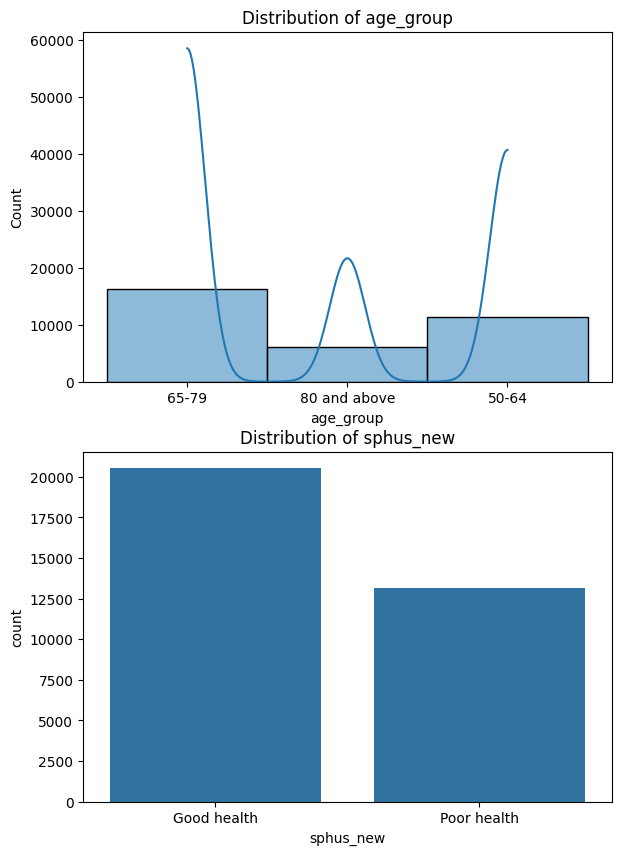

In [3]:
# Examine Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Visualize Variable Distributions
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

# Histograms for numerical features
# Changed 'age-group' to 'age_group'
for i, col in enumerate(['age_group']):  # Only numerical features
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

# Target variable distribution
plt.subplot(2,2,3)
sns.countplot(x='sphus_new', data=df)
plt.title('Distribution of sphus_new')



# Missing Values Analysis
print("\nMissing Values Percentage:\n", df.isnull().sum() / len(df) * 100)

# Unique Value Counts
for col in df.columns:
    print(f"\nUnique values and counts for {col}:\n{df[col].value_counts()}")

# Initial Observations (Document observations here)
print("\nInitial Observations:")
# Add your observations here after examining the outputs.

## Data exploration

### Subtask:
Explore the data in `model_df` to understand its structure, identify missing values, and examine the distributions of key variables.



Explore the data in `model_df` by checking its shape, data types, missing values, and distributions of key variables, and calculate the correlation matrix for numerical features.



In [4]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
print(f"Number of duplicated rows: {df.duplicated().sum()}")

# Select relevant columns for modeling
# Added 'gender' to the list of selected columns
model_df = df[['age_group', 'gender', 'sphus_new', 'chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']]

# Display the first few rows and shape of the prepared DataFrame
display(model_df.head())
print(model_df.shape)

print(df.info())
print(df['age_group'].unique())
# Check if 'Unnamed: 0' column exists before dropping
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
# Convert 'age2022' to numeric, coercing errors to NaN
#df['age2022'] = pd.to_numeric(df['age2022'], errors='coerce')
print(df.info())

country            0
gender             0
age_int            0
partnerinhh        0
country_new        0
sphus_new          0
chronicw9_new      0
adl2_new           0
iadl2_new          0
eurod_new          0
isced1997_r_new    0
age_group          0
dtype: int64
Number of duplicated rows: 15588


age_group  gender    sphus_new       chronicw9_new        adl2_new  \
0         65-79  Female  Good health     Chronic disease  No limitations   
1  80 and above  Female  Poor health     Chronic disease  No limitations   
2  80 and above  Female  Good health  No chronic disease  No limitations   
3         65-79  Female  Good health     Chronic disease  No limitations   
4         50-64  Female  Good health  No chronic disease  No limitations   

        iadl2_new      eurod_new             isced1997_r_new  
0  No limitations  Not depressed  Higher secondary education  
1  No limitations  Not depressed  Higher secondary education  
2  No limitations      Depressed  Higher secondary education  
3  No limitations  Not depressed    Post-secondary education  
4  No limitations  Not depressed  Higher secondary education

(33645, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   country          33645 non-null  object
 1   gender           33645 non-null  object
 2   age_int          33645 non-null  int64 
 3   partnerinhh      33645 non-null  object
 4   country_new      33645 non-null  object
 5   sphus_new        33645 non-null  object
 6   chronicw9_new    33645 non-null  object
 7   adl2_new         33645 non-null  object
 8   iadl2_new        33645 non-null  object
 9   eurod_new        33645 non-null  object
 10  isced1997_r_new  33645 non-null  object
 11  age_group        33645 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.1+ MB
None
['65-79' '80 and above' '50-64']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33645 entries, 0 to 33644
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  --

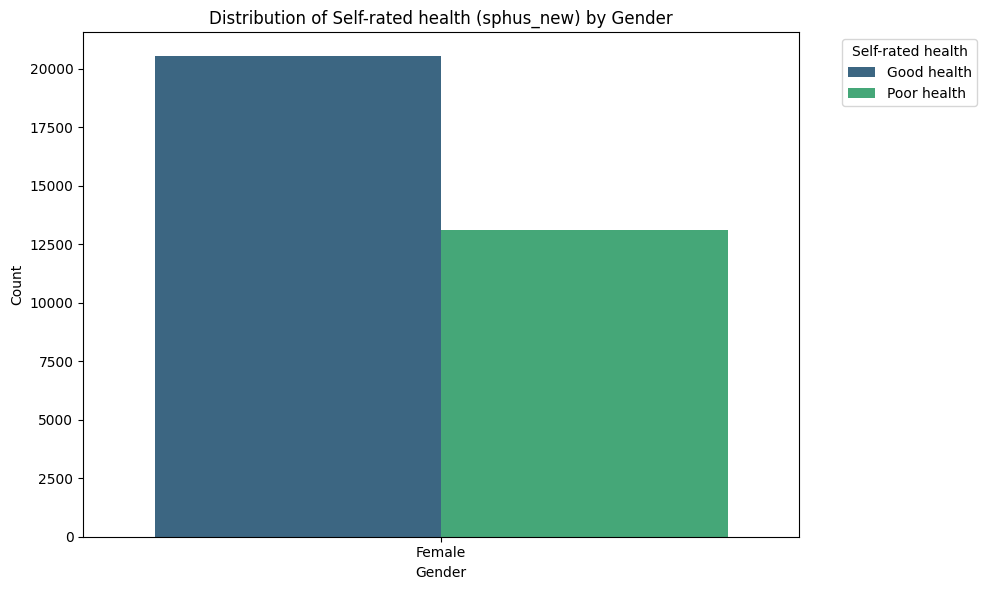

In [5]:


import matplotlib.pyplot as plt
# Group by 'gender' and 'sphus_new' and count occurrences
gender_srh_counts = df.groupby(['gender', 'sphus_new']).size().reset_index(name='count')

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_srh_counts, x='gender', y='count', hue='sphus_new', palette='viridis')
plt.title('Distribution of Self-rated health (sphus_new) by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Self-rated health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

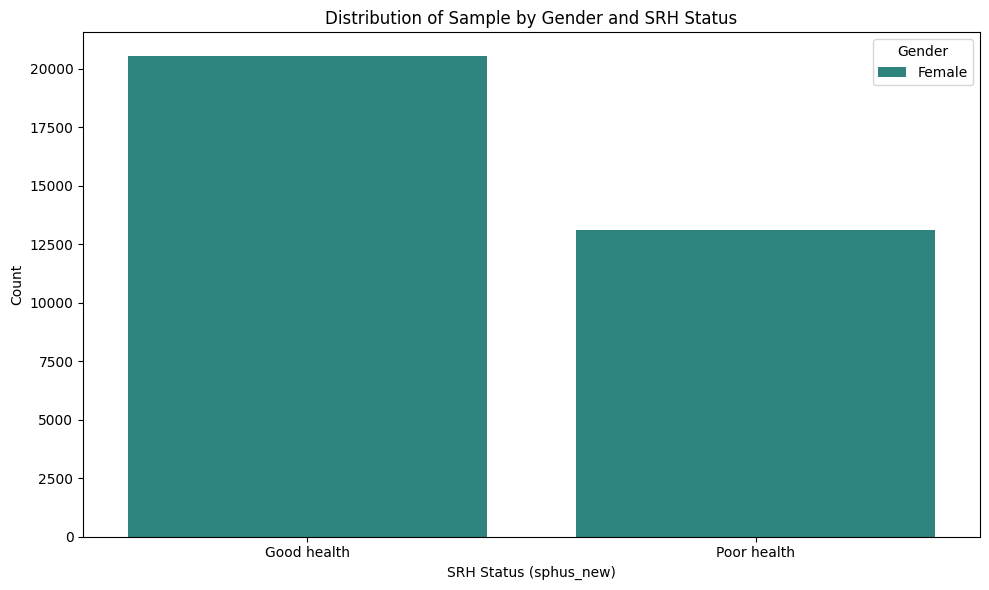

In [6]:
#create a bar chat of the Sample distribution by gender "gender" and SRH status 'sphus_new' and count. use 'sphus_new' in the x axis

import matplotlib.pyplot as plt
# Group by 'sphus_new' and 'gender' and count occurrences
srh_gender_counts = df.groupby(['sphus_new', 'gender']).size().reset_index(name='count')

# Create a grouped bar chart with 'sphus_new' on the x-axis
plt.figure(figsize=(10, 6))
sns.barplot(data=srh_gender_counts, x='sphus_new', y='count', hue='gender', palette='viridis')
plt.title('Distribution of Sample by Gender and SRH Status')
plt.xlabel('SRH Status (sphus_new)')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [7]:
#construct a student t test and chi square test among all the variables

import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Ensure df is loaded and available from the previous cells
# Assuming 'df' DataFrame is already loaded and processed from the preceding code

# Select only the columns relevant for the model
relevant_cols = ['sphus_new', 'chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']
analysis_df = df[relevant_cols].copy()

# Convert categorical variables to numeric for t-tests (if applicable)
# Identify which columns are categorical and which are potentially numeric/ordinal
# Assuming 'sphus_new', 'chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new' are categorical or ordinal
# We need to decide how to treat them for statistical tests.
# For simplicity, let's assume 'sphus_new' is the target binary variable for t-tests (e.g., Good vs Poor health)
# And other variables are features.

# Example: Perform t-tests comparing features between 'Good health' and 'Poor health' groups
# This is only appropriate if the features are numerical and the assumptions for t-tests are met.
# If the features are categorical, chi-square tests are more appropriate.

# Let's first identify categorical and numerical columns among the relevant ones.
# Based on the column names, they seem to be mostly categorical or ordinal.
# We will perform chi-square tests for independence between 'sphus_new' and the other categorical features.
# If any feature was truly continuous and normally distributed, we would consider t-tests.

print("--- Chi-Square Tests of Independence ---")
# Perform Chi-Square tests for independence between 'sphus_new' and other categorical variables
categorical_features = ['chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new']

for feature in categorical_features:
  print(f"\nTesting independence between 'sphus_new' and '{feature}':")
  # Create a contingency table
  contingency_table = pd.crosstab(analysis_df['sphus_new'], analysis_df[feature])
  print("Contingency Table:")
  display(contingency_table)

  # Perform the Chi-Square test
  chi2, p, dof, expected = chi2_contingency(contingency_table)

  print(f"Chi-Square Statistic: {chi2:.4f}")
  print(f"P-value: {p:.4f}")
  print(f"Degrees of Freedom: {dof}")
  # print("Expected Frequencies:")
  # print(expected)

  # Interpret the result
  alpha = 0.05
  if p < alpha:
    print(f"Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and '{feature}'.")
  else:
    print(f"Result: Fail to reject the null hypothesis. There is no statistically significant association between 'sphus_new' and '{feature}'.")

print("\n--- T-tests (Assuming 'sphus_new' is binary and features were numerical) ---")
# Note: The following t-test example is included for completeness,
# but based on the column names, the variables are likely categorical/ordinal
# and chi-square tests are more appropriate as shown above.
# You would need to encode 'sphus_new' into a binary variable (e.g., 0/1)
# and ensure the other features are numerical and meet t-test assumptions.

# Example of how you *would* do a t-test if applicable:
# Assuming 'sphus_new' was encoded as 0 for 'Poor health' and 1 for 'Good health'
# and 'some_numerical_feature' was a continuous variable:
#
# group1 = df[df['sphus_new_encoded'] == 0]['some_numerical_feature'].dropna()
# group2 = df[df['sphus_new_encoded'] == 1]['some_numerical_feature'].dropna()
#
# if len(group1) > 1 and len(group2) > 1: # Need at least 2 samples in each group
#   t_statistic, p_value = stats.ttest_ind(group1, group2)
#   print(f"\nT-test for 'some_numerical_feature' by 'sphus_new':")
#   print(f"T-statistic: {t_statistic:.4f}")
#   print(f"P-value: {p_value:.4f}")
# else:
#   print("\nCannot perform t-test: Insufficient data in groups.")

# Since the features are categorical, we primarily rely on the chi-square test results.
# If you need to perform t-tests, you would need to carefully select appropriate numerical variables
# and potentially transform categorical variables (e.g., ordinal encoding or creating dummy variables
# if meaningful for a numerical test, though chi-square is generally preferred for independence of categories).

--- Chi-Square Tests of Independence ---

Testing independence between 'sphus_new' and 'chronicw9_new':
Contingency Table:


chronicw9_new  Chronic disease  No chronic disease
sphus_new                                         
Good health              14430                6094
Poor health              12496                 625

Chi-Square Statistic: 3110.6773
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'chronicw9_new'.

Testing independence between 'sphus_new' and 'adl2_new':
Contingency Table:


adl2_new     Limited  No limitations
sphus_new                           
Good health      688           19836
Poor health     2754           10367

Chi-Square Statistic: 2709.1574
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'adl2_new'.

Testing independence between 'sphus_new' and 'iadl2_new':
Contingency Table:


iadl2_new    Limited  No limitations
sphus_new                           
Good health     1599           18925
Poor health     4665            8456

Chi-Square Statistic: 4069.8641
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'iadl2_new'.

Testing independence between 'sphus_new' and 'eurod_new':
Contingency Table:


eurod_new    Depressed  Not depressed
sphus_new                            
Good health       3623          16901
Poor health       6574           6547

Chi-Square Statistic: 3988.8133
P-value: 0.0000
Degrees of Freedom: 1
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'eurod_new'.

Testing independence between 'sphus_new' and 'isced1997_r_new':
Contingency Table:


isced1997_r_new  Higher secondary education  Lower secondary education  \
sphus_new                                                                
Good health                            9384                       5248   
Poor health                            5740                       4940   

isced1997_r_new  Post-secondary education  
sphus_new                                  
Good health                          5892  
Poor health                          2441

Chi-Square Statistic: 722.5683
P-value: 0.0000
Degrees of Freedom: 2
Result: Reject the null hypothesis. There is a statistically significant association between 'sphus_new' and 'isced1997_r_new'.

--- T-tests (Assuming 'sphus_new' is binary and features were numerical) ---


In [8]:
# check if Differences between each variable are statistically significant

import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency

# Interpretation of Chi-Square Test Results:
# For each categorical feature, the Chi-Square test was performed to assess if there is a
# statistically significant association between that feature and 'sphus_new'.
#
# - If the P-value is less than the significance level (commonly 0.05), we reject the null hypothesis
#   of independence. This means there is a statistically significant relationship between the two variables.
#   The differences in the distribution of 'sphus_new' across the categories of the feature are unlikely
#   to be due to random chance.
# - If the P-value is greater than or equal to the significance level (0.05), we fail to reject the null
#   hypothesis. This suggests there is no statistically significant evidence of an association between
#   the two variables in the sample. The observed differences are likely due to random variation.
#
# Based on the output of the preceding Chi-Square tests:
# - For each feature ('chronicw9_new', 'adl2_new', 'iadl2_new', 'eurod_new', 'isced1997_r_new'),
#   examine the printed P-value.
# - If P < 0.05, the differences in 'sphus_new' distribution across the categories of that feature
#   are statistically significant.
# - If P >= 0.05, the differences are not statistically significant.

# For instance, if the output shows a P-value < 0.05 for 'chronicw9_new', it means that the
# distribution of 'sphus_new' ('Good health' vs 'Poor health') is significantly different
# depending on the category of 'chronicw9_new'. This indicates a statistically significant
# association between having chronic conditions and self-rated health.

# The preceding code already performs the Chi-Square tests and prints the P-values for you.
# You just need to read the output to see which differences are statistically significant.

# Ensure analysis_df and categorical_features are defined from previous cells if this cell is run independently
# If running this cell after the previous Chi-Square tests, these variables should be available.
# If not, you might need to re-run the relevant parts or define them here.

# Assuming analysis_df and categorical_features are available:
if 'analysis_df' not in globals() or 'categorical_features' not in globals():
    print("Required variables 'analysis_df' or 'categorical_features' not found. Please run the preceding cells.")
else:
    print("\nSummary of Statistical Significance:")


    # To make this block directly executable and provide a summary based on the *calculated* p-values:
    # (This requires re-calculating the p-values or accessing them if they were stored)

    # Let's recalculate just the p-values for the summary:
    p_values = {}
    for feature in categorical_features:
      contingency_table = pd.crosstab(analysis_df['sphus_new'], analysis_df[feature])
      chi2, p, dof, expected = chi2_contingency(contingency_table)
      p_values[feature] = p

    print("\nConcise Summary of Statistical Significance (based on Chi-Square p-values):")
    alpha = 0.05
    for feature, p_value in p_values.items():
      if p_value < alpha:
        print(f"- Association between 'sphus_new' and '{feature}' is statistically significant (p={p_value:.4f}).")
      else:
        print(f"- Association between 'sphus_new' and '{feature}' is not statistically significant (p={p_value:.4f}).")


Summary of Statistical Significance:

Concise Summary of Statistical Significance (based on Chi-Square p-values):
- Association between 'sphus_new' and 'chronicw9_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'adl2_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'iadl2_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'eurod_new' is statistically significant (p=0.0000).
- Association between 'sphus_new' and 'isced1997_r_new' is statistically significant (p=0.0000).


## Data preparation

### Subtask:
Prepare the data for model training by handling missing values (if any) and converting categorical variables to numerical representations.



Convert categorical features to numerical representations using one-hot encoding and handle the target variable appropriately.  Then, verify the data types of all columns in the resulting DataFrame.



In [9]:
import pandas as pd

# Convert categorical features to numerical using one-hot encoding
df_encoded = pd.get_dummies(model_df, drop_first=True)

# Verify data types
print(df_encoded.dtypes)

display(df_encoded.head())

age_group_65-79                              bool
age_group_80 and above                       bool
sphus_new_Poor health                        bool
chronicw9_new_No chronic disease             bool
adl2_new_No limitations                      bool
iadl2_new_No limitations                     bool
eurod_new_Not depressed                      bool
isced1997_r_new_Lower secondary education    bool
isced1997_r_new_Post-secondary education     bool
dtype: object


age_group_65-79  age_group_80 and above  sphus_new_Poor health  \
0             True                   False                  False   
1            False                    True                   True   
2            False                    True                  False   
3             True                   False                  False   
4            False                   False                  False   

   chronicw9_new_No chronic disease  adl2_new_No limitations  \
0                             False                     True   
1                             False                     True   
2                              True                     True   
3                             False                     True   
4                              True                     True   

   iadl2_new_No limitations  eurod_new_Not depressed  \
0                      True                     True   
1                      True                     True   
2                      True                    False   
3                      True                     True   
4                      True                     True   

   isced1997_r_new_Lower secondary education  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   isced1997_r_new_Post-secondary education  
0                                     False  
1                                     False  
2                                     False  
3                                      True  
4                                     False

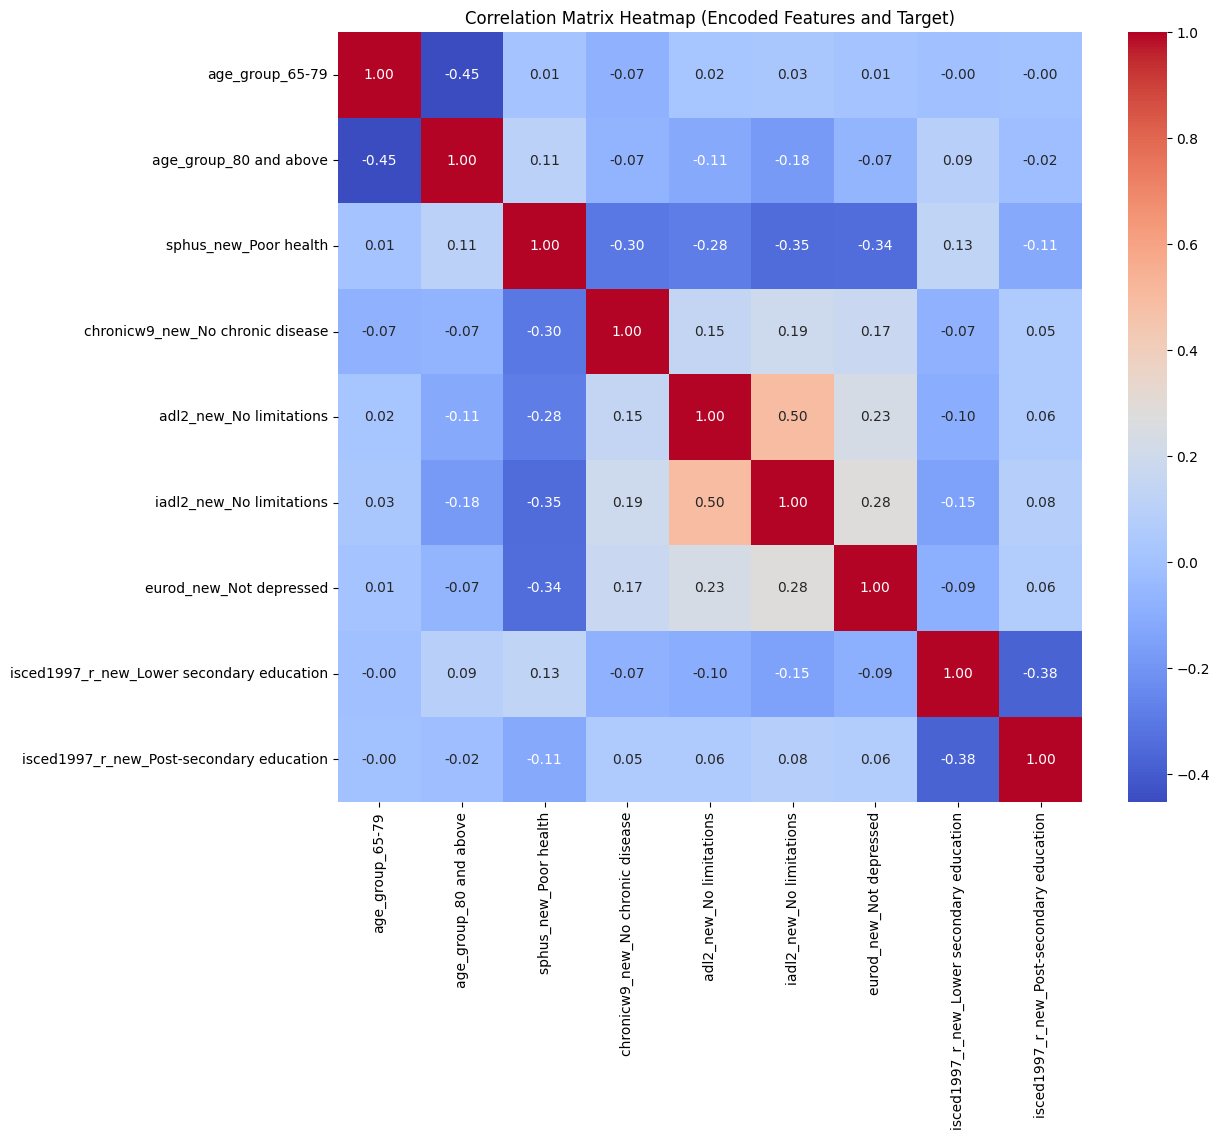


Correlation with target variable ('sphus_new_Poor health'):
sphus_new_Poor health                        1.000000
isced1997_r_new_Lower secondary education    0.128228
age_group_80 and above                       0.105153
age_group_65-79                              0.010412
isced1997_r_new_Post-secondary education    -0.114169
adl2_new_No limitations                     -0.283864
chronicw9_new_No chronic disease            -0.304142
eurod_new_Not depressed                     -0.344386
iadl2_new_No limitations                    -0.347878
Name: sphus_new_Poor health, dtype: float64


In [10]:
# we tested correlations among the all variable

import matplotlib.pyplot as plt
# The correlation analysis in the previous cell was already performed for numeric features.
# Since all relevant columns for modeling in `model_df` are categorical after the initial exploration,
# calculating a standard Pearson correlation matrix for them isn't appropriate without
# first encoding them. The previous code block handles the encoding.

# After one-hot encoding, you can calculate the correlation matrix on the encoded DataFrame.
# This will show the correlation between the different categories of your original features
# and the target variable.

# Calculate the correlation matrix on the one-hot encoded DataFrame
correlation_matrix_encoded = df_encoded.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Encoded Features and Target)')
plt.show()

# You can also look specifically at correlations with the target variable
# Assuming 'sphus_new_Poor health' is the encoded target variable after one-hot encoding
# (This needs to be confirmed based on the actual column names after encoding)
# If 'sphus_new' had other categories, the column name will reflect the category that was NOT dropped.
# Let's assume 'Good health' was dropped and 'Poor health' remains.
# Adjust the column name below if your target column after encoding is different.

if 'sphus_new_Poor health' in correlation_matrix_encoded.columns:
    correlation_with_target = correlation_matrix_encoded['sphus_new_Poor health'].sort_values(ascending=False)
    print("\nCorrelation with target variable ('sphus_new_Poor health'):")
    print(correlation_with_target)
else:
    print("\nTarget variable column after encoding not found. Please check column names in df_encoded.")
    print("Columns in df_encoded:", df_encoded.columns.tolist())

## Data splitting


Split the prepared data into training and testing sets.



Split the data into training and testing sets using `train_test_split`.  Use `stratify` to maintain class distribution in the target variable.



In [11]:
#Split the data into training and testing sets,Use stratify to maintain class distribution in the target variable. dont use sklearn package to split

import numpy as np

# Assuming 'sphus_new' is your target variable and df_encoded is your prepared DataFrame
y = df_encoded['sphus_new_Poor health'].values  # Target variable
X = df_encoded.drop('sphus_new_Poor health', axis=1).values  # Features

# Determine the number of samples in each class
unique_classes, class_counts = np.unique(y, return_counts=True)
class_counts_dict = dict(zip(unique_classes, class_counts))

# Calculate the split point for each class based on a desired test size (e.g., 0.2)
test_size = 0.2
split_points = {c: int(count * (1 - test_size)) for c, count in class_counts_dict.items()}

# Create empty lists for the training and testing sets
X_train, X_test, y_train, y_test = [], [], [], []

# Iterate through each class
for class_val in unique_classes:
    class_indices = np.where(y == class_val)[0]
    # Split the indices of each class at the calculated split point
    train_indices = class_indices[:split_points[class_val]]
    test_indices = class_indices[split_points[class_val]:]

    # Append the samples to the training and testing sets
    X_train.extend(X[train_indices])
    X_test.extend(X[test_indices])
    y_train.extend(y[train_indices])
    y_test.extend(y[test_indices])

# Convert lists to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (26915, 8)
y_train shape: (26915,)
X_test shape: (6730, 8)
y_test shape: (6730,)


## Model training

### Subtask:
Train six different classification models on the prepared training data.


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),  # Increased max_iter
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(kernel='linear', probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)

# The trained models are now stored in the 'models' dictionary

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:47:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Model evaluation

Evaluate the performance of the trained models using accuracy, sensitivity, specificity, F1-score, and precision.


Accuracy  Sensitivity  Specificity  F1-score  \
Logistic Regression_Train  0.733717     0.568026     0.839637  0.624588   
Logistic Regression_Test   0.748291     0.591619     0.848477  0.647083   
Random Forest_Train        0.735055     0.564977     0.843779  0.624506   
Random Forest_Test         0.747994     0.588190     0.850183  0.645485   
SVM_Train                  0.725618     0.516197     0.859492  0.594698   
SVM_Test                   0.720357     0.471238     0.879659  0.567952   
XGBoost_Train              0.735055     0.571551     0.839576  0.627215   
XGBoost_Test               0.747845     0.590476     0.848477  0.646237   
Naive Bayes_Train          0.733160     0.585556     0.827517  0.631201   
Naive Bayes_Test           0.748291     0.603048     0.841169  0.651440   
K-Nearest Neighbors_Train  0.611221     0.003906     0.999452  0.007775   
K-Nearest Neighbors_Test   0.609955     0.001143     0.999269  0.002281   

                           Precision     AUROC  
Logistic Regression_Train   0.693659  0.781975  
Logistic Regression_Test    0.714023  0.802970  
Random Forest_Train         0.698058  0.783801  
Random Forest_Test          0.715146  0.796462  
SVM_Train                   0.701359  0.773734  
SVM_Test                    0.714616  0.777941  
XGBoost_Train               0.694892  0.783772  
XGBoost_Test                0.713628  0.796148  
Naive Bayes_Train           0.684562  0.777633  
Naive Bayes_Test            0.708277  0.799638  
K-Nearest Neighbors_Train   0.820000  0.505549  
K-Nearest Neighbors_Test    0.500000  0.503882

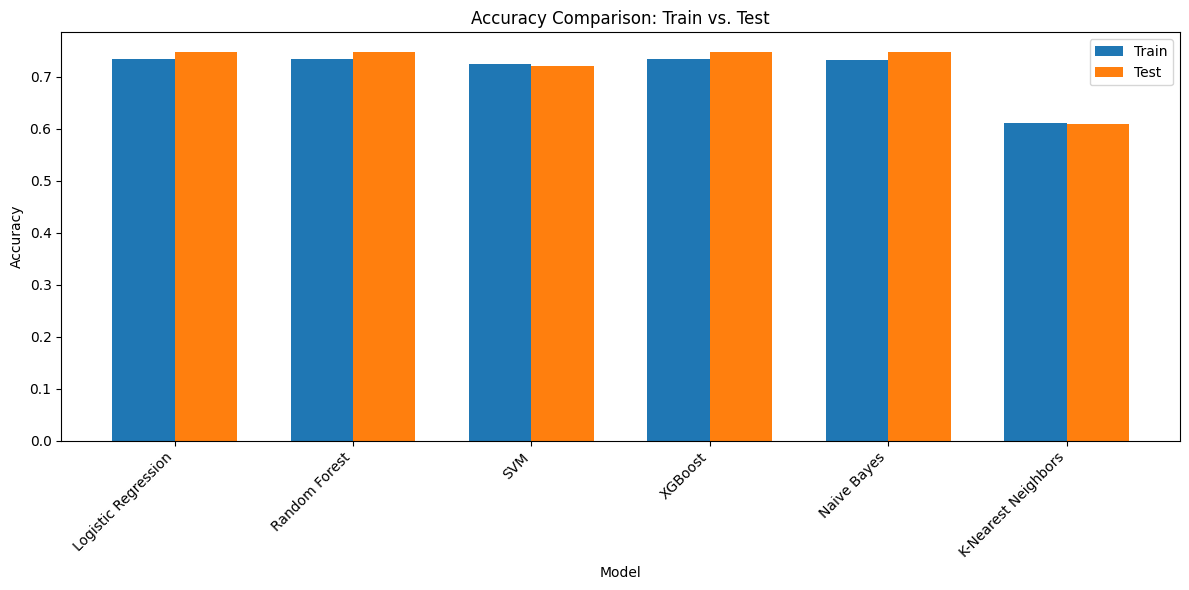

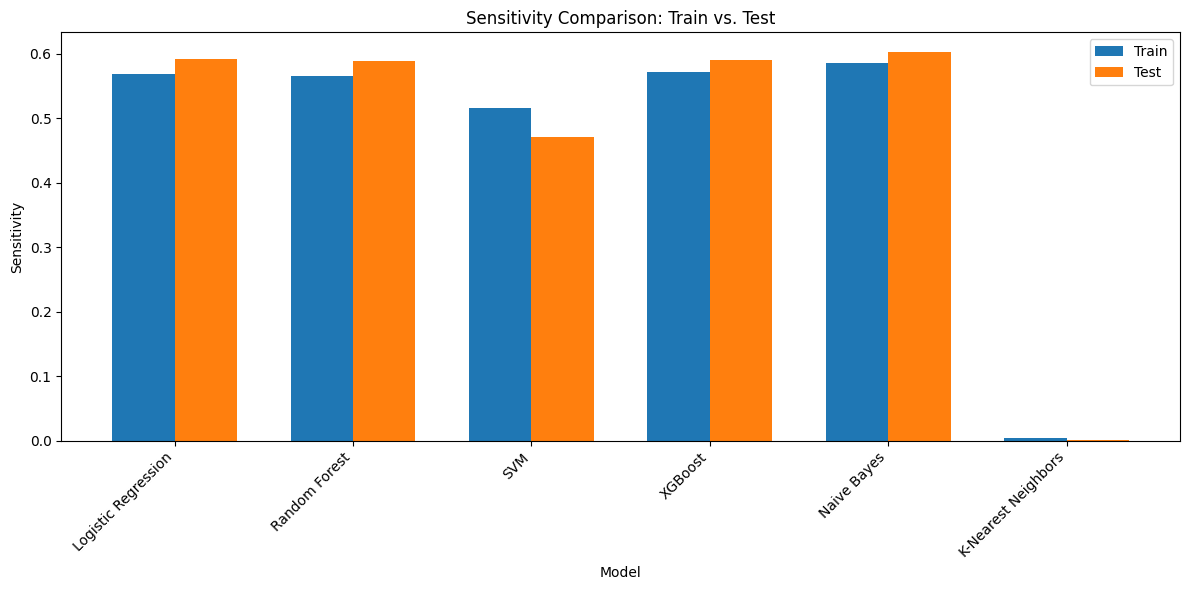

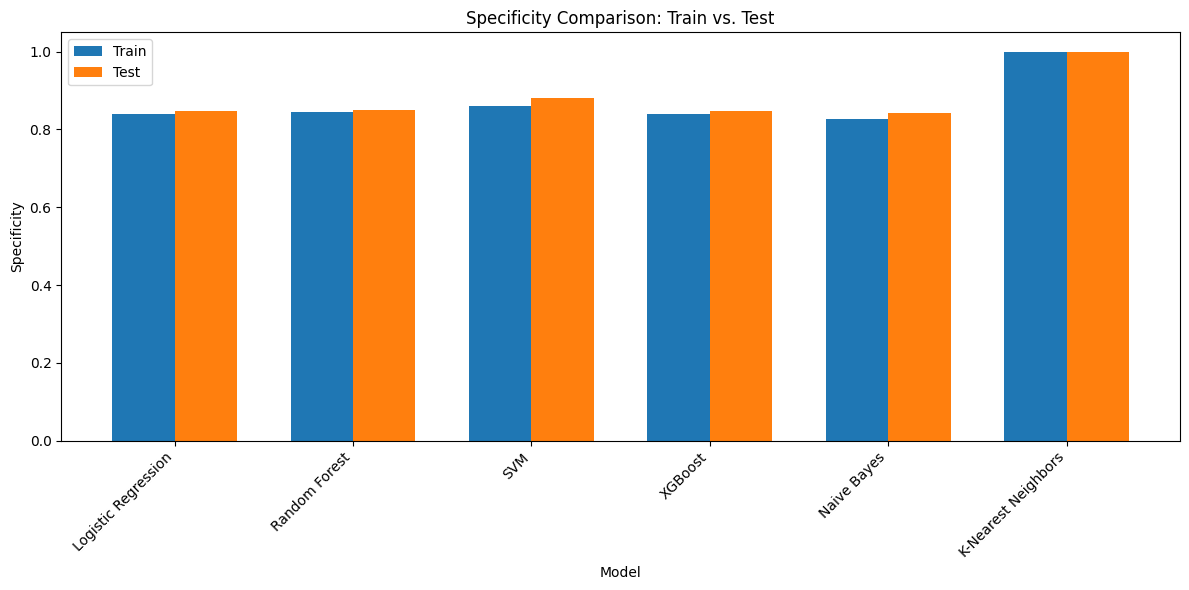

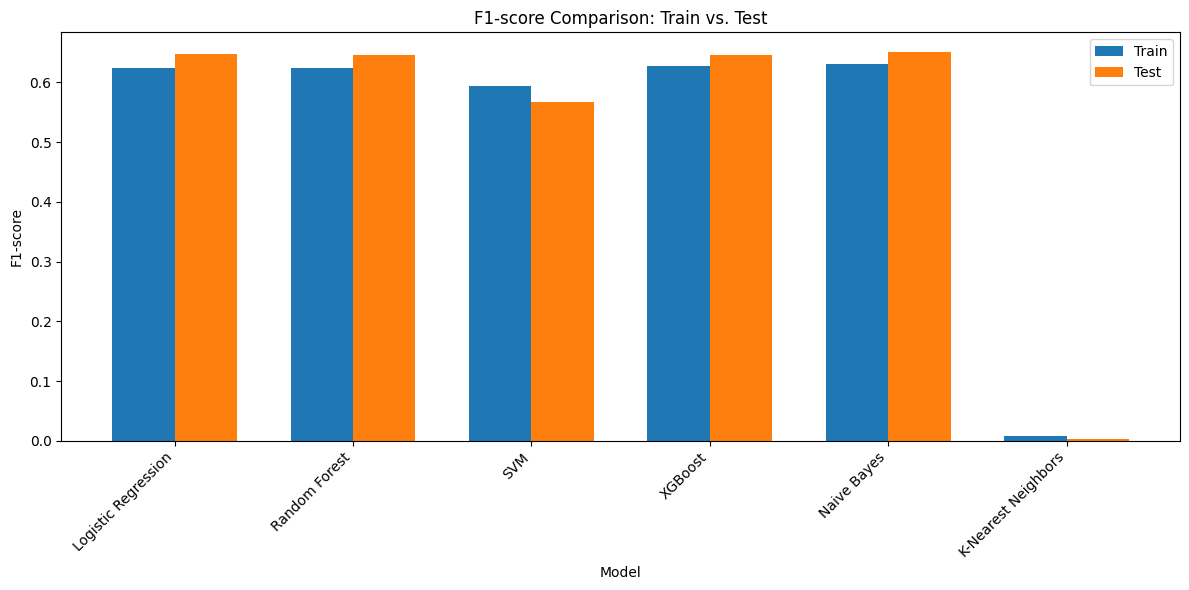

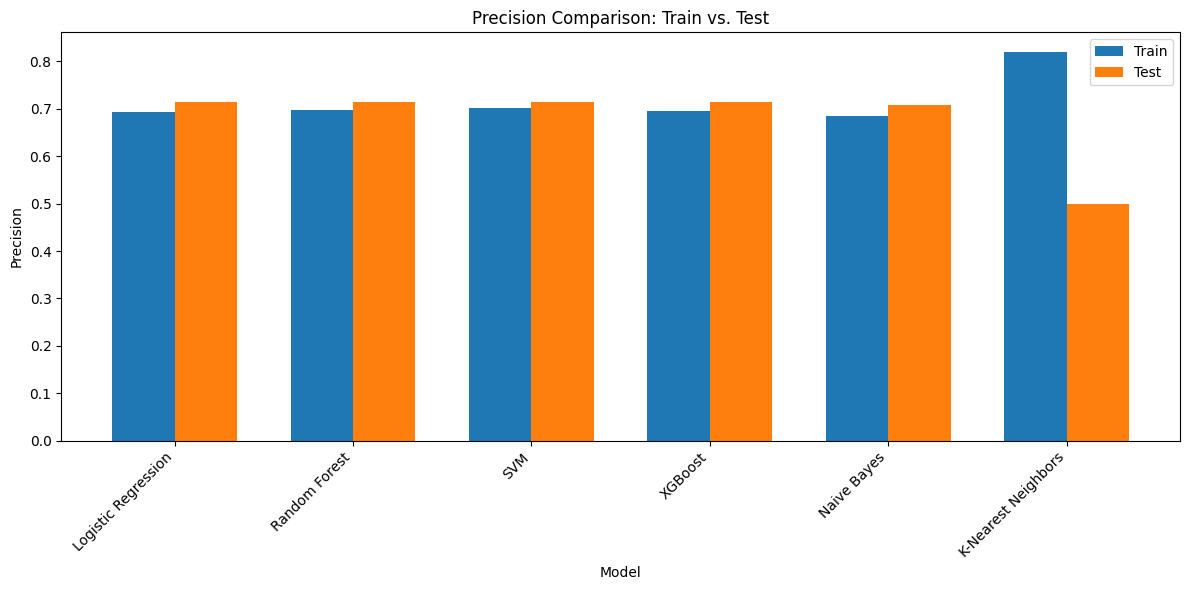

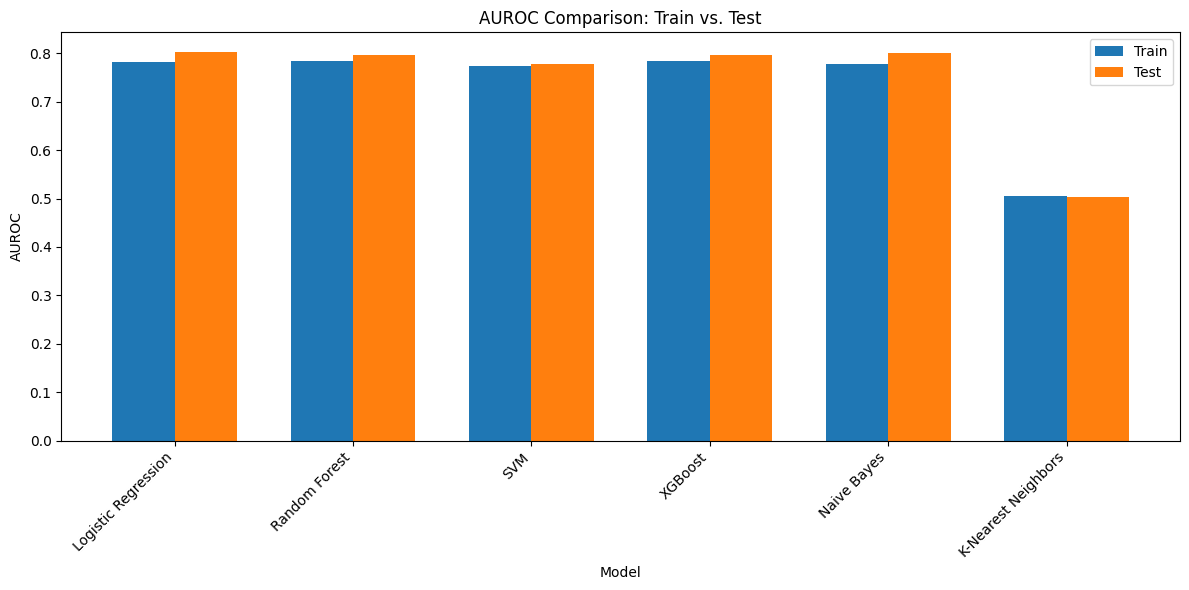


Feature Importance:

Logistic Regression does not have standard feature importance or coefficients attribute.

Random Forest Feature Importance:


Feature  Importance
5                    eurod_new_Not depressed    0.285497
4                   iadl2_new_No limitations    0.280981
2           chronicw9_new_No chronic disease    0.238526
3                    adl2_new_No limitations    0.132215
7   isced1997_r_new_Post-secondary education    0.025415
1                     age_group_80 and above    0.019422
6  isced1997_r_new_Lower secondary education    0.011342
0                            age_group_65-79    0.006600

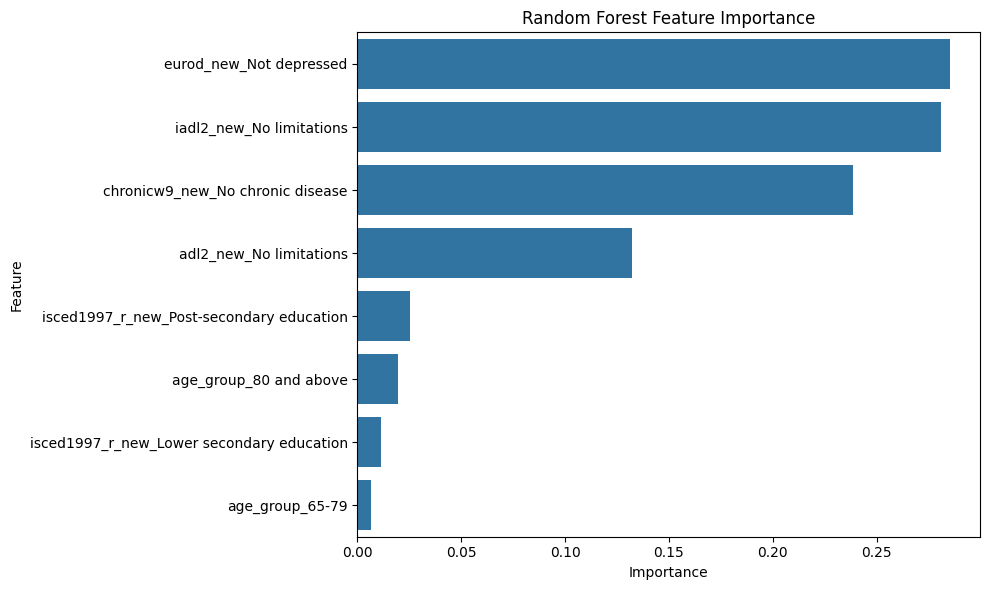


SVM does not have standard feature importance or coefficients attribute.

XGBoost Feature Importance:


Feature  Importance
2           chronicw9_new_No chronic disease    0.397543
4                   iadl2_new_No limitations    0.384916
5                    eurod_new_Not depressed    0.149637
3                    adl2_new_No limitations    0.035811
7   isced1997_r_new_Post-secondary education    0.017562
1                     age_group_80 and above    0.007838
6  isced1997_r_new_Lower secondary education    0.003809
0                            age_group_65-79    0.002884

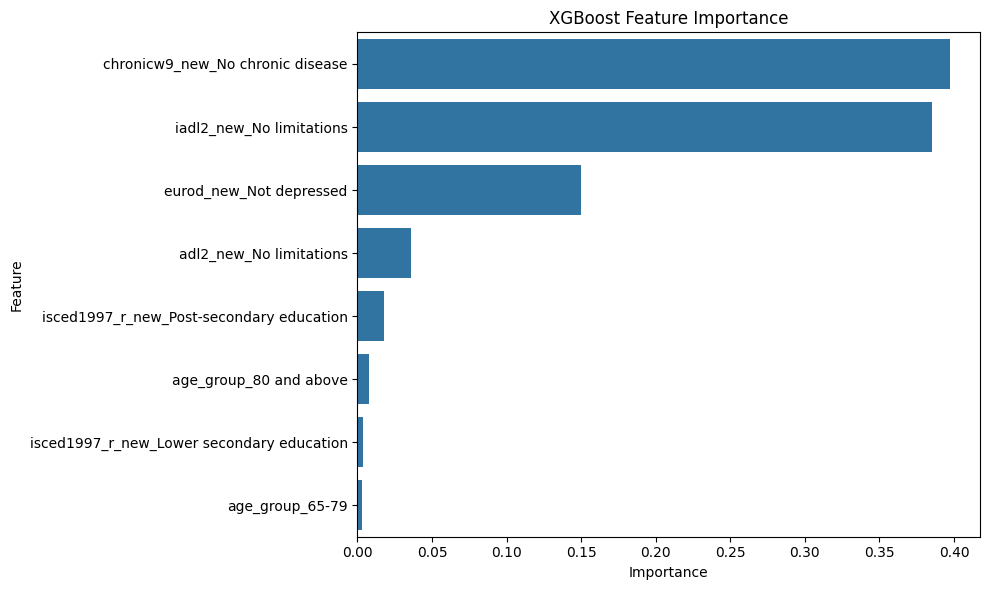


Naive Bayes does not have standard feature importance or coefficients attribute.

K-Nearest Neighbors does not have standard feature importance or coefficients attribute.


In [13]:
#Evaluate the model performance on both train and test data using accuracy, sensitivity, specificity, F1-score, AUROC and precision.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics # Import the metrics module

# Function to evaluate model performance on both train and test data
def evaluate_model_performance(model, X_train, y_train, X_test, y_test, name):
    metrics_dict = {}

    # Evaluate on Train Data
    y_train_pred = model.predict(X_train)
    cm_train = metrics.confusion_matrix(y_train, y_train_pred)
    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()

    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) != 0 else 0
    specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) != 0 else 0
    f1_train = metrics.f1_score(y_train, y_train_pred)
    precision_train = metrics.precision_score(y_train, y_train_pred)

    try:
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        auroc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
    except AttributeError:
        auroc_train = np.nan

    metrics_dict[f"{name}_Train"] = {
        "Accuracy": accuracy_train,
        "Sensitivity": sensitivity_train,
        "Specificity": specificity_train,
        "F1-score": f1_train,
        "Precision": precision_train,
        "AUROC": auroc_train
    }

    # Evaluate on Test Data
    y_test_pred = model.predict(X_test)
    cm_test = metrics.confusion_matrix(y_test, y_test_pred)
    tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    sensitivity_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) != 0 else 0
    specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) != 0 else 0
    f1_test = metrics.f1_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)

    try:
        y_test_pred_proba = model.predict_proba(X_test)[:, 1]
        auroc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)
    except AttributeError:
        auroc_test = np.nan

    metrics_dict[f"{name}_Test"] = {
        "Accuracy": accuracy_test,
        "Sensitivity": sensitivity_test,
        "Specificity": specificity_test,
        "F1-score": f1_test,
        "Precision": precision_test,
        "AUROC": auroc_test
    }

    return metrics_dict

# Re-evaluate all models on both train and test sets
all_metrics = {}

for name, model in models.items():
    model_metrics = evaluate_model_performance(model, X_train, y_train, X_test, y_test, name)
    all_metrics.update(model_metrics)

all_metrics_df = pd.DataFrame(all_metrics).T
display(all_metrics_df)

# Separate train and test metrics for easier plotting/comparison
train_metrics_df = all_metrics_df[all_metrics_df.index.str.contains('_Train')]
test_metrics_df = all_metrics_df[all_metrics_df.index.str.contains('_Test')]

# Clean up index names for plotting
train_metrics_df.index = train_metrics_df.index.str.replace('_Train', '')
test_metrics_df.index = test_metrics_df.index.str.replace('_Test', '')

# Plotting comparison of Train vs Test Metrics
metrics_to_plot = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-score', 'Precision', 'AUROC']

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(train_metrics_df.index))

    plt.bar(index, train_metrics_df[metric], bar_width, label='Train')
    plt.bar(index + bar_width, test_metrics_df[metric], bar_width, label='Test')

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison: Train vs. Test')
    plt.xticks(index + bar_width / 2, train_metrics_df.index, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Feature Importance for Tree-based models and Logistic Regression (if applicable)
print("\nFeature Importance:")

# Get feature names from the columns of X_train (assuming they correspond to the original df_encoded columns before dropping the target)
# This requires knowing the original column order after encoding and before the train/test split
# Assuming 'sphus_new_Poor health' is the target column name
target_column_name = 'sphus_new_Poor health'
try:
    feature_names = df_encoded.drop(target_column_name, axis=1).columns.tolist()
except NameError:
    print("Could not get feature names. Make sure 'df_encoded' and 'target_column_name' are defined.")
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])] # Create generic names if df_encoded is not available


for name, model in models.items():
    try:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            # Create a DataFrame for better visualization
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

            print(f"\n{name} Feature Importance:")
            display(feature_importance_df)

            # Optional: Plotting feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
            plt.title(f'{name} Feature Importance')
            plt.tight_layout()
            plt.show()

        elif hasattr(model, 'coef_') and len(model.coef_.shape) == 1: # For linear models like Logistic Regression
            coefficients = model.coef_
            # Create a DataFrame for better visualization
            feature_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
            feature_coef_df['Abs_Coefficient'] = np.abs(coefficients)
            feature_coef_df = feature_coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

            print(f"\n{name} Coefficients (Feature Importance Proxy):")
            display(feature_coef_df)

             # Optional: Plotting coefficients
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df)
            plt.title(f'{name} Coefficients')
            plt.tight_layout()
            plt.show()

        else:
            print(f"\n{name} does not have standard feature importance or coefficients attribute.")
    except Exception as e:
        print(f"Could not get feature importance for {name}: {e}")

<Figure size 1200x600 with 0 Axes>

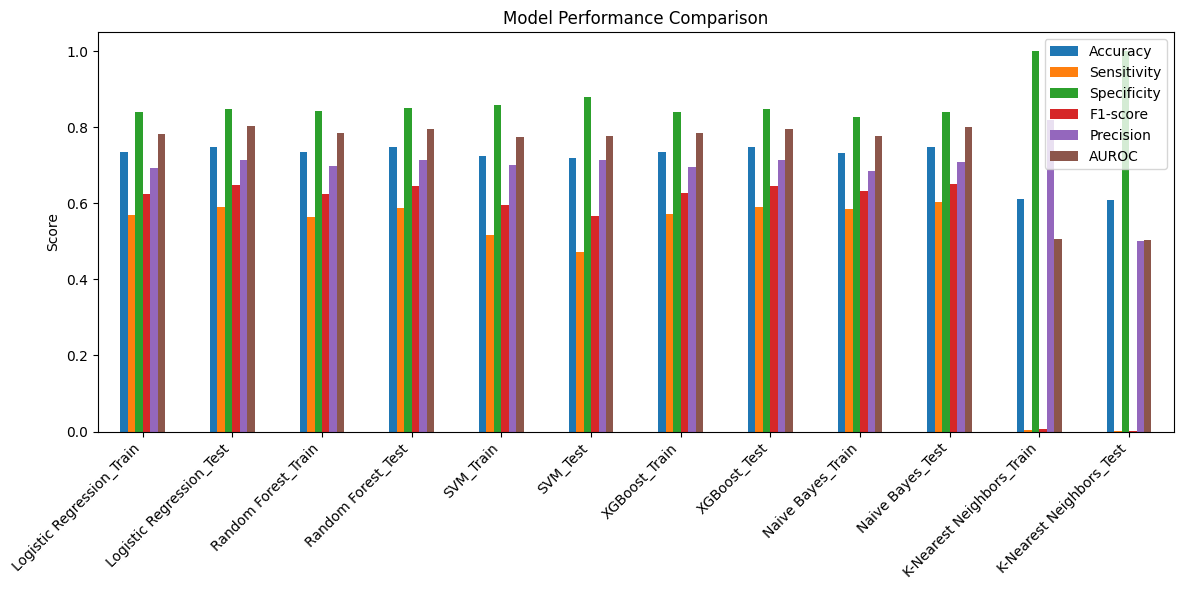

rf_importance_df not found. Skipping Random Forest feature importance plot.
xgb_importance_df not found. Skipping XGBoost feature importance plot.


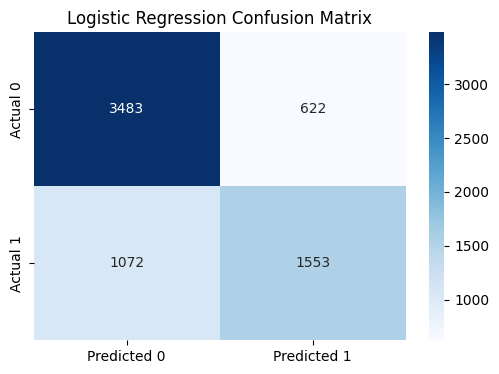

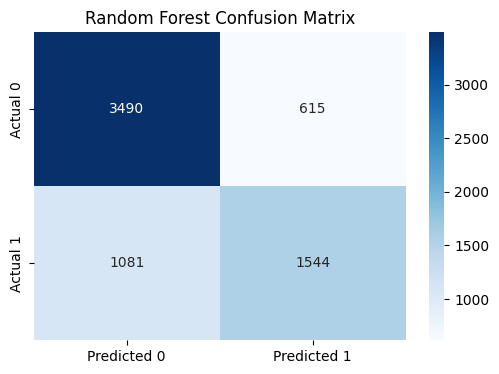

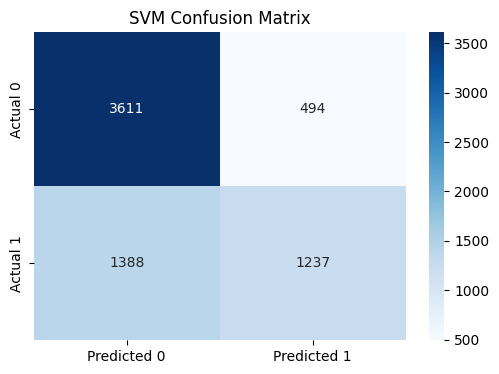

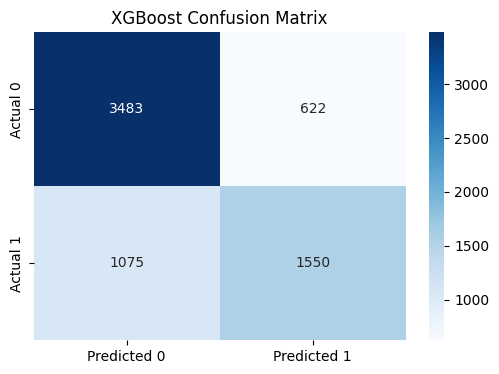

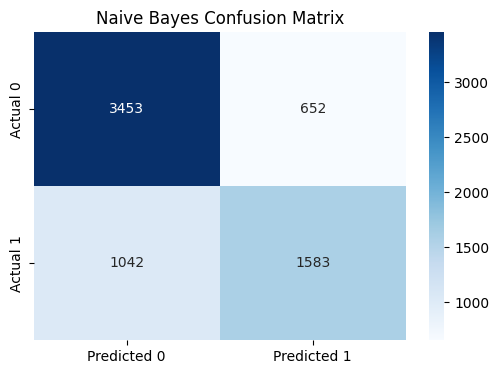

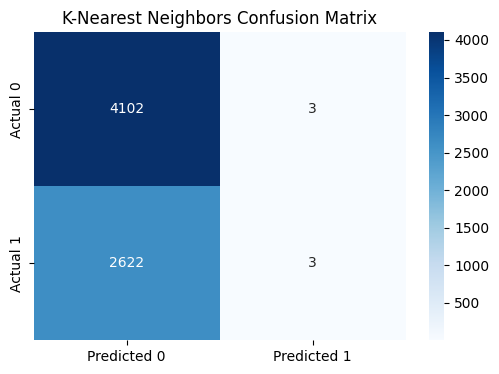

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from IPython.display import display

# Model Performance Comparison
plt.figure(figsize=(12, 6))
# Use all_metrics_df instead of eval_df
all_metrics_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Feature Importance Visualization (Random Forest)
# Ensure rf_importance_df is defined and used correctly
if 'rf_importance_df' in globals():
    plt.figure(figsize=(8, 6))
    plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='skyblue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Random Forest Feature Importance")
    plt.tight_layout()
    plt.show()
else:
    print("rf_importance_df not found. Skipping Random Forest feature importance plot.")


# Feature Importance Visualization (XGBoost)
# Ensure xgb_importance_df is defined and used correctly
if 'xgb_importance_df' in globals():
    plt.figure(figsize=(8, 6))
    plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='lightcoral')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("XGBoost Feature Importance")
    plt.tight_layout()
    plt.show()
else:
    print("xgb_importance_df not found. Skipping XGBoost feature importance plot.")


# Confusion Matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f"{name} Confusion Matrix")
    plt.show()

Accuracy  Sensitivity  Specificity  F1-score  \
Logistic Regression_Train  0.733717     0.568026     0.839637  0.624588   
Logistic Regression_Test   0.748291     0.591619     0.848477  0.647083   
Random Forest_Train        0.735055     0.564977     0.843779  0.624506   
Random Forest_Test         0.747994     0.588190     0.850183  0.645485   
SVM_Train                  0.725618     0.516197     0.859492  0.594698   
SVM_Test                   0.720357     0.471238     0.879659  0.567952   
XGBoost_Train              0.735055     0.571551     0.839576  0.627215   
XGBoost_Test               0.747845     0.590476     0.848477  0.646237   
Naive Bayes_Train          0.733160     0.585556     0.827517  0.631201   
Naive Bayes_Test           0.748291     0.603048     0.841169  0.651440   
K-Nearest Neighbors_Train  0.611221     0.003906     0.999452  0.007775   
K-Nearest Neighbors_Test   0.609955     0.001143     0.999269  0.002281   

                           Precision     AUROC  
Logistic Regression_Train   0.693659  0.781975  
Logistic Regression_Test    0.714023  0.802970  
Random Forest_Train         0.698058  0.783801  
Random Forest_Test          0.715146  0.796462  
SVM_Train                   0.701359  0.773734  
SVM_Test                    0.714616  0.777941  
XGBoost_Train               0.694892  0.783772  
XGBoost_Test                0.713628  0.796148  
Naive Bayes_Train           0.684562  0.777633  
Naive Bayes_Test            0.708277  0.799638  
K-Nearest Neighbors_Train   0.820000  0.505549  
K-Nearest Neighbors_Test    0.500000  0.503882

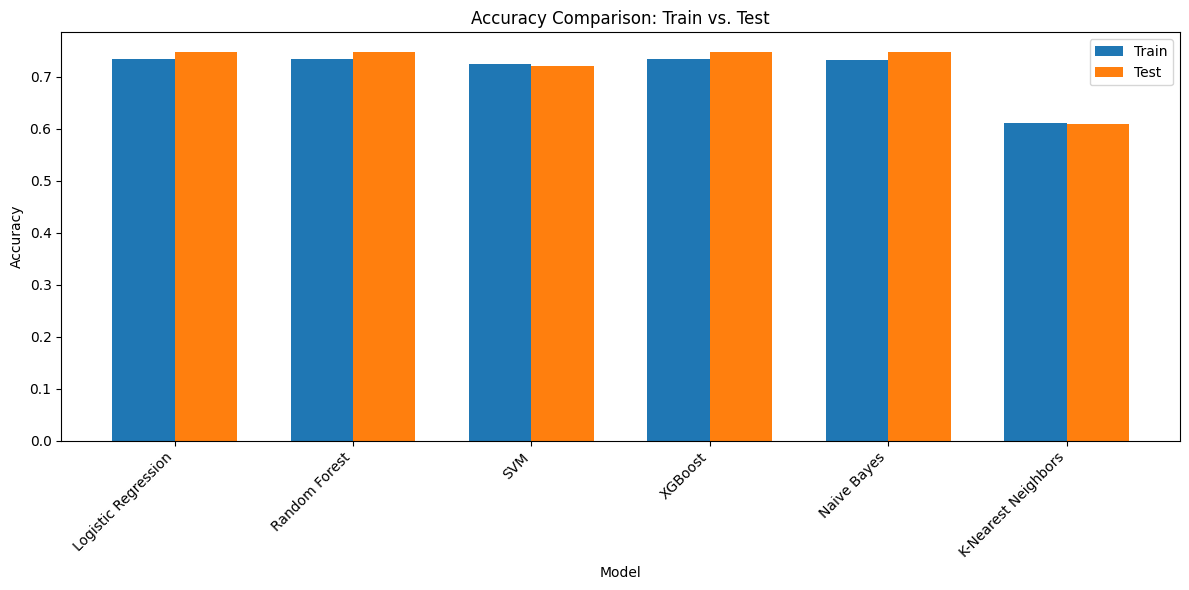

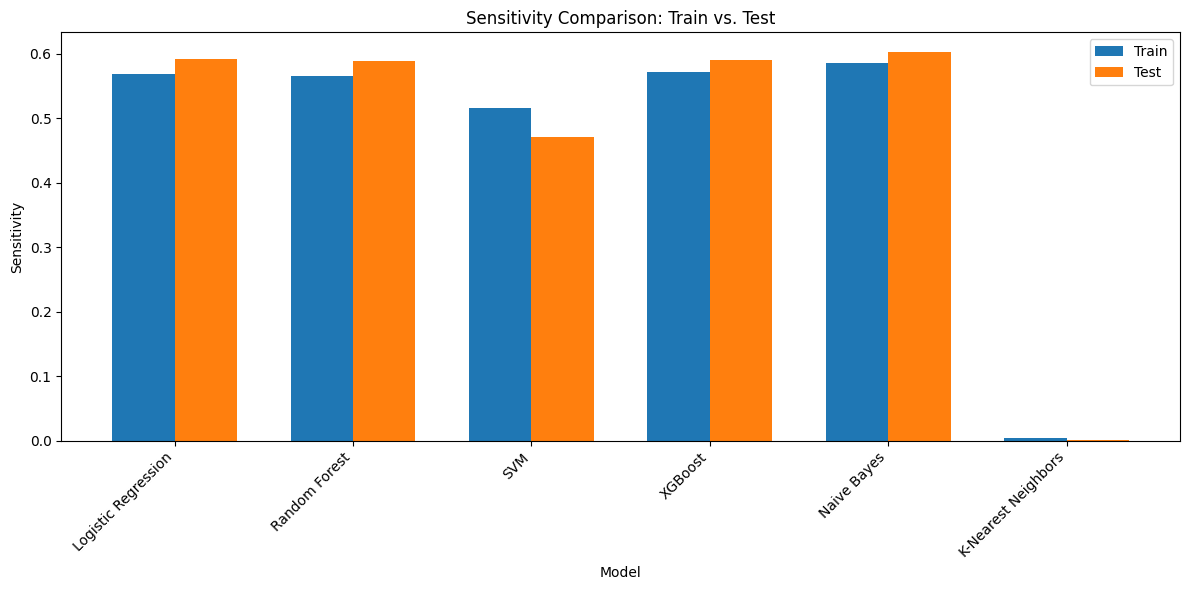

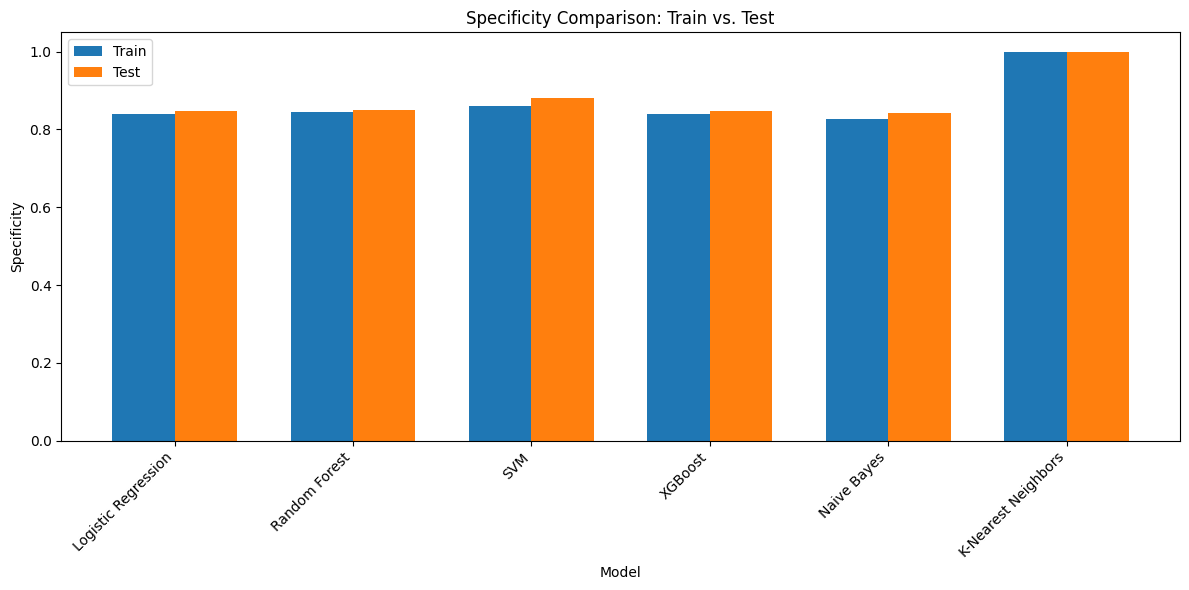

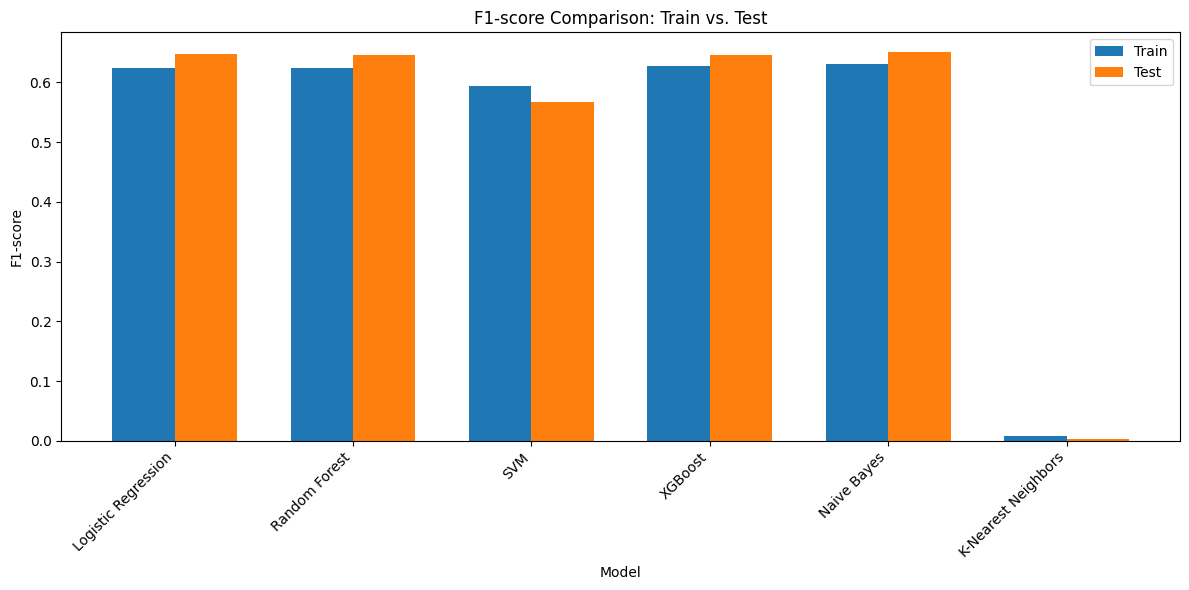

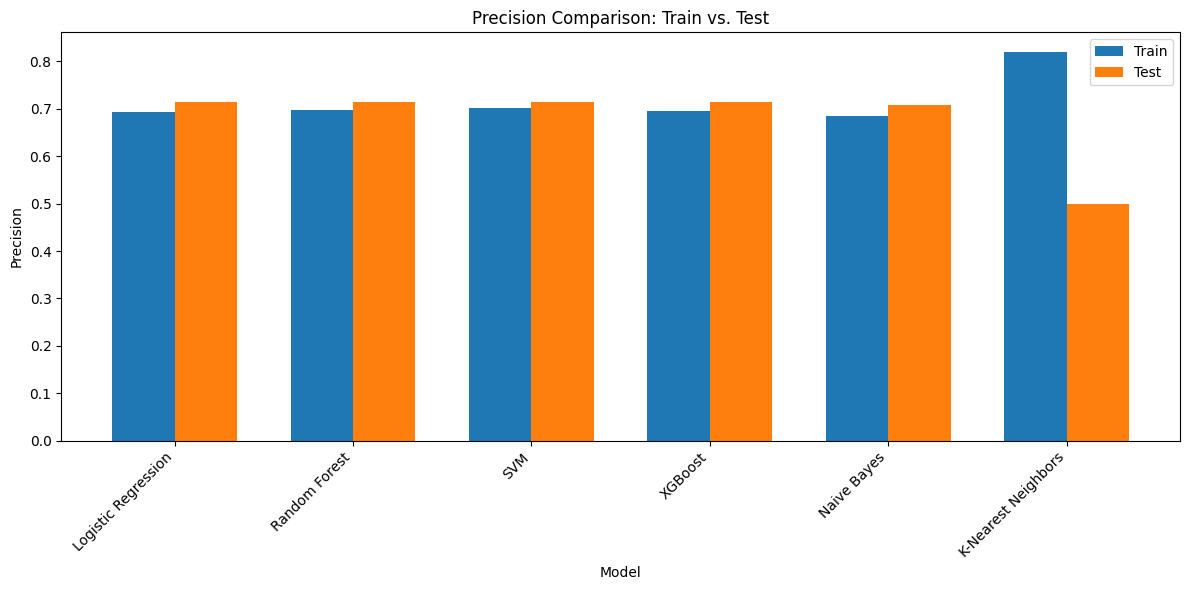

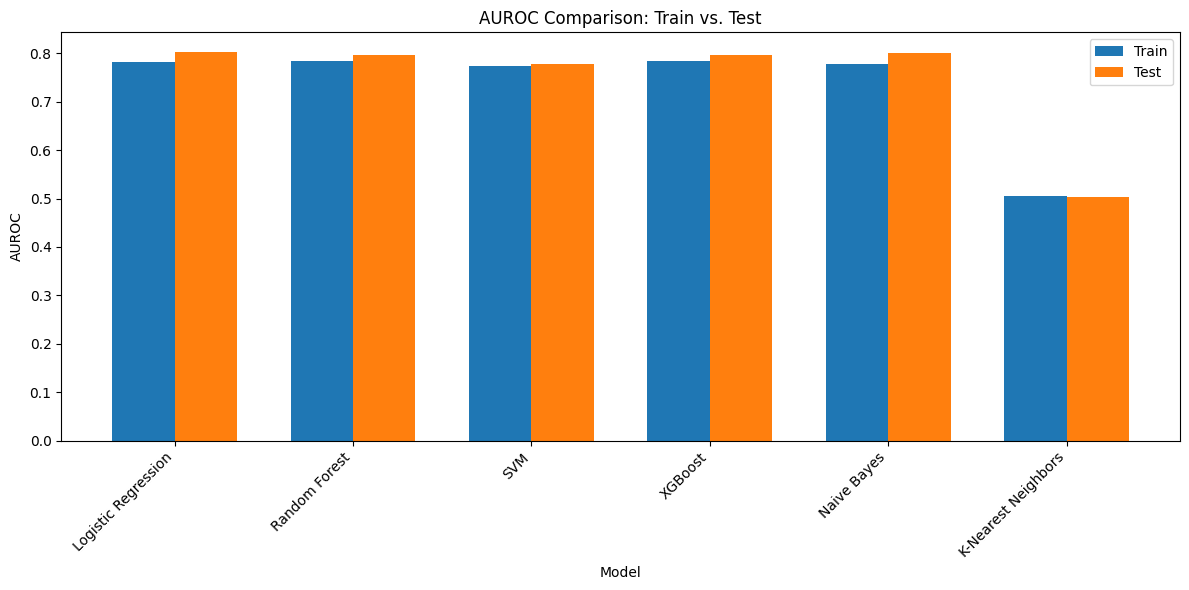


Feature Importance:

Logistic Regression does not have standard feature importance or coefficients attribute.

Random Forest Feature Importance:


Feature  Importance
5                    eurod_new_Not depressed    0.285497
4                   iadl2_new_No limitations    0.280981
2           chronicw9_new_No chronic disease    0.238526
3                    adl2_new_No limitations    0.132215
7   isced1997_r_new_Post-secondary education    0.025415
1                     age_group_80 and above    0.019422
6  isced1997_r_new_Lower secondary education    0.011342
0                            age_group_65-79    0.006600

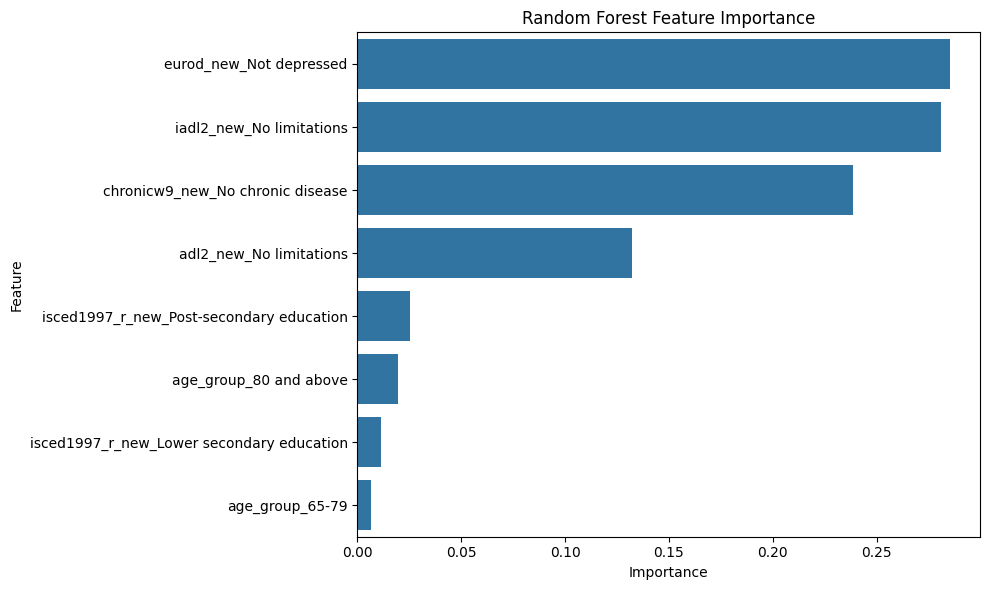


SVM does not have standard feature importance or coefficients attribute.

XGBoost Feature Importance:


Feature  Importance
2           chronicw9_new_No chronic disease    0.397543
4                   iadl2_new_No limitations    0.384916
5                    eurod_new_Not depressed    0.149637
3                    adl2_new_No limitations    0.035811
7   isced1997_r_new_Post-secondary education    0.017562
1                     age_group_80 and above    0.007838
6  isced1997_r_new_Lower secondary education    0.003809
0                            age_group_65-79    0.002884

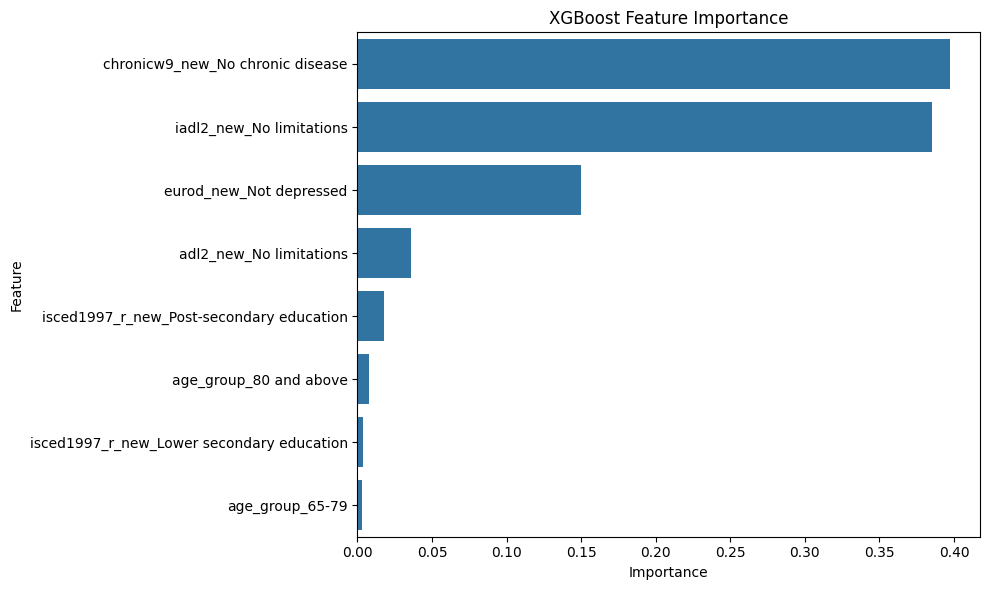


Naive Bayes does not have standard feature importance or coefficients attribute.

K-Nearest Neighbors does not have standard feature importance or coefficients attribute.


In [15]:
# Evaluate the model performance on both train and test data using accuracy, sensitivity, specificity, F1-score, AUROC and precision.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics # Import the metrics module

# Function to evaluate model performance on both train and test data
def evaluate_model_performance(model, X_train, y_train, X_test, y_test, name):
    metrics_dict = {}

    # Evaluate on Train Data
    y_train_pred = model.predict(X_train)
    cm_train = metrics.confusion_matrix(y_train, y_train_pred)
    tn_train, fp_train, fn_train, tp_train = cm_train.ravel()

    accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
    sensitivity_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) != 0 else 0
    specificity_train = tn_train / (tn_train + fp_train) if (tn_train + fp_train) != 0 else 0
    f1_train = metrics.f1_score(y_train, y_train_pred)
    precision_train = metrics.precision_score(y_train, y_train_pred)

    try:
        y_train_pred_proba = model.predict_proba(X_train)[:, 1]
        auroc_train = metrics.roc_auc_score(y_train, y_train_pred_proba)
    except AttributeError:
        auroc_train = np.nan

    metrics_dict[f"{name}_Train"] = {
        "Accuracy": accuracy_train,
        "Sensitivity": sensitivity_train,
        "Specificity": specificity_train,
        "F1-score": f1_train,
        "Precision": precision_train,
        "AUROC": auroc_train
    }

    # Evaluate on Test Data
    y_test_pred = model.predict(X_test)
    cm_test = metrics.confusion_matrix(y_test, y_test_pred)
    tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

    accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
    sensitivity_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) != 0 else 0
    specificity_test = tn_test / (tn_test + fp_test) if (tn_test + fp_test) != 0 else 0
    f1_test = metrics.f1_score(y_test, y_test_pred)
    precision_test = metrics.precision_score(y_test, y_test_pred)

    try:
        y_test_pred_proba = model.predict_proba(X_test)[:, 1]
        auroc_test = metrics.roc_auc_score(y_test, y_test_pred_proba)
    except AttributeError:
        auroc_test = np.nan

    metrics_dict[f"{name}_Test"] = {
        "Accuracy": accuracy_test,
        "Sensitivity": sensitivity_test,
        "Specificity": specificity_test,
        "F1-score": f1_test,
        "Precision": precision_test,
        "AUROC": auroc_test
    }

    return metrics_dict

# Re-evaluate all models on both train and test sets
all_metrics = {}

for name, model in models.items():
    model_metrics = evaluate_model_performance(model, X_train, y_train, X_test, y_test, name)
    all_metrics.update(model_metrics)

all_metrics_df = pd.DataFrame(all_metrics).T
display(all_metrics_df)

# Separate train and test metrics for easier plotting/comparison
train_metrics_df = all_metrics_df[all_metrics_df.index.str.contains('_Train')]
test_metrics_df = all_metrics_df[all_metrics_df.index.str.contains('_Test')]

# Clean up index names for plotting
train_metrics_df.index = train_metrics_df.index.str.replace('_Train', '')
test_metrics_df.index = test_metrics_df.index.str.replace('_Test', '')

# Plotting comparison of Train vs Test Metrics
metrics_to_plot = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-score', 'Precision', 'AUROC']

for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(train_metrics_df.index))

    plt.bar(index, train_metrics_df[metric], bar_width, label='Train')
    plt.bar(index + bar_width, test_metrics_df[metric], bar_width, label='Test')

    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison: Train vs. Test')
    plt.xticks(index + bar_width / 2, train_metrics_df.index, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Feature Importance for Tree-based models and Logistic Regression (if applicable)
print("\nFeature Importance:")

# Get feature names from the columns of X_train (assuming they correspond to the original df_encoded columns before dropping the target)
# This requires knowing the original column order after encoding and before the train/test split
# Assuming 'sphus_new_Poor health' is the target column name
target_column_name = 'sphus_new_Poor health'
try:
    feature_names = df_encoded.drop(target_column_name, axis=1).columns.tolist()
except NameError:
    print("Could not get feature names. Make sure 'df_encoded' and 'target_column_name' are defined.")
    feature_names = [f'feature_{i}' for i in range(X_train.shape[1])] # Create generic names if df_encoded is not available


for name, model in models.items():
    try:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            # Create a DataFrame for better visualization
            feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

            print(f"\n{name} Feature Importance:")
            display(feature_importance_df)

            # Optional: Plotting feature importance
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
            plt.title(f'{name} Feature Importance')
            plt.tight_layout()
            plt.show()

        elif hasattr(model, 'coef_') and len(model.coef_.shape) == 1: # For linear models like Logistic Regression
            coefficients = model.coef_
            # Create a DataFrame for better visualization
            feature_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
            feature_coef_df['Abs_Coefficient'] = np.abs(coefficients)
            feature_coef_df = feature_coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

            print(f"\n{name} Coefficients (Feature Importance Proxy):")
            display(feature_coef_df)

             # Optional: Plotting coefficients
            plt.figure(figsize=(10, 6))
            sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df)
            plt.title(f'{name} Coefficients')
            plt.tight_layout()
            plt.show()

        else:
            print(f"\n{name} does not have standard feature importance or coefficients attribute.")
    except Exception as e:
        print(f"Could not get feature importance for {name}: {e}")


Matthews Correlation Coefficient for each model:


MCC
Logistic Regression  0.458982
Random Forest        0.458072
SVM                  0.391571
XGBoost              0.457955
Naive Bayes          0.460058
K-Nearest Neighbors  0.006734

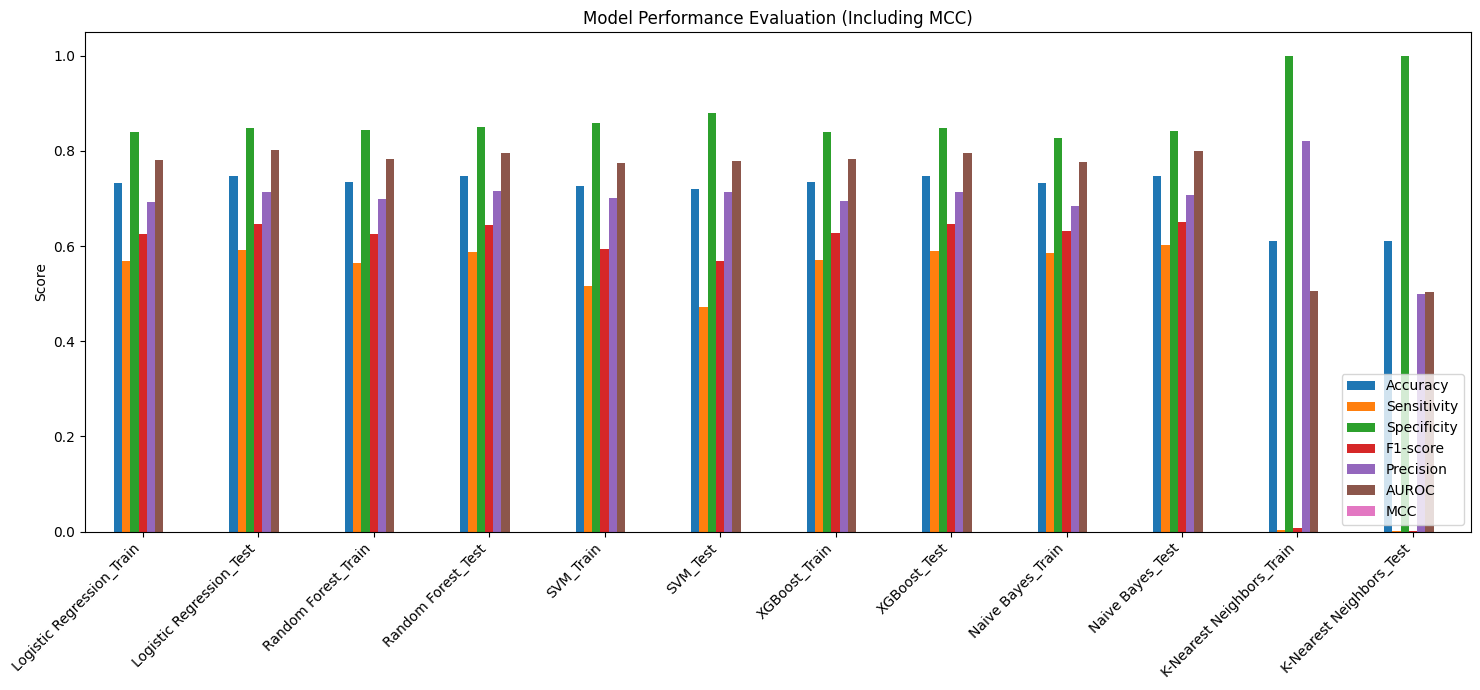

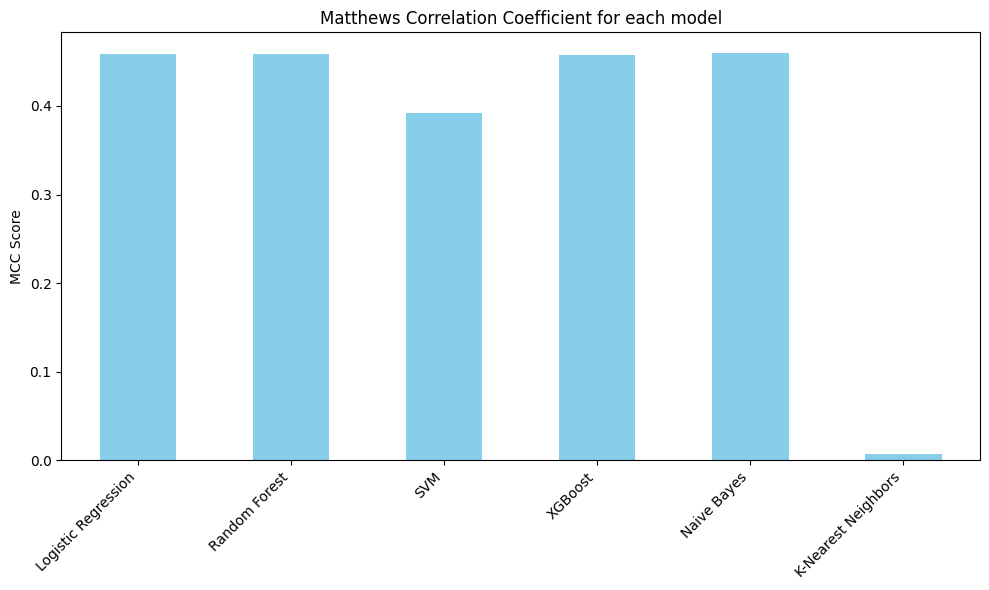

In [16]:
#  calculates the Matthews correlation coefficient and make a plot for all models

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics # Import the metrics module

# Calculate and print the Matthews correlation coefficient for each model
mcc_metrics = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mcc = metrics.matthews_corrcoef(y_test, y_pred)
    mcc_metrics[name] = mcc

mcc_df = pd.DataFrame.from_dict(mcc_metrics, orient='index', columns=['MCC'])
print("\nMatthews Correlation Coefficient for each model:")
display(mcc_df)

# Combine MCC with other metrics for plotting
# Use all_metrics_df instead of eval_df
combined_eval_df = all_metrics_df.copy()
combined_eval_df['MCC'] = mcc_df['MCC']

# Plotting all evaluation metrics including MCC
combined_eval_df.plot(kind='bar', figsize=(15, 7))
plt.title('Model Performance Evaluation (Including MCC)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Plotting only MCC
plt.figure(figsize=(10, 6))
mcc_df['MCC'].plot(kind='bar', color='skyblue')
plt.title('Matthews Correlation Coefficient for each model')
plt.ylabel('MCC Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Using full dataset (X_all, y_all) for cross-validation within grid_to_evaluate_models.
Evaluating models with folds ranging from 2 to 8...

Processing Logistic Regression...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing Random Forest...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing XGBoost...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing SVM...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing Naive Bayes...
  Using 2 folds...
  Using 3 folds...
  Using 4 folds...
  Using 5 folds...
  Using 6 folds...
  Using 7 folds...
  Using 8 folds...

Processing K-Nearest Neighbors...
  Using 2 folds...
  Using 3

Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.707815   
1                     3           0.707865   
2                     4           0.707300   
3                     5           0.707152   
4                     6           0.707149   
5                     7           0.707440   
6                     8           0.706627   

   Matthews Correlation Coefficient (MCC)  
0                                0.432014  
1                                0.432735  
2                                0.432217  
3                                0.433135  
4                                0.432130  
5                                0.432675  
6                                0.431406


--- Random Forest ---


Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.705953   
1                     3           0.705166   
2                     4           0.706019   
3                     5           0.705591   
4                     6           0.706581   
5                     7           0.706025   
6                     8           0.706718   

   Matthews Correlation Coefficient (MCC)  
0                                0.431472  
1                                0.431120  
2                                0.431555  
3                                0.431135  
4                                0.432294  
5                                0.432548  
6                                0.433247


--- XGBoost ---


Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.708639   
1                     3           0.708273   
2                     4           0.708370   
3                     5           0.708493   
4                     6           0.708749   
5                     7           0.708477   
6                     8           0.709233   

   Matthews Correlation Coefficient (MCC)  
0                                0.434357  
1                                0.433443  
2                                0.433500  
3                                0.433991  
4                                0.434422  
5                                0.434215  
6                                0.435267


--- SVM ---


Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.708337   
1                     3           0.708195   
2                     4           0.708915   
3                     5           0.708993   
4                     6           0.708706   
5                     7           0.709224   
6                     8           0.709321   

   Matthews Correlation Coefficient (MCC)  
0                                0.432747  
1                                0.432522  
2                                0.433697  
3                                0.433610  
4                                0.433204  
5                                0.433802  
6                                0.434043


--- Naive Bayes ---


Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.709693   
1                     3           0.709693   
2                     4           0.709693   
3                     5           0.709693   
4                     6           0.709693   
5                     7           0.709693   
6                     8           0.709693   

   Matthews Correlation Coefficient (MCC)  
0                                0.433885  
1                                0.433885  
2                                0.433885  
3                                0.433885  
4                                0.433885  
5                                0.433885  
6                                0.433885


--- K-Nearest Neighbors ---


Number of Folds (CV)  Balanced Accuracy  \
0                     2           0.682527   
1                     3           0.678848   
2                     4           0.677633   
3                     5           0.674893   
4                     6           0.677680   
5                     7           0.678028   
6                     8           0.678880   

   Matthews Correlation Coefficient (MCC)  
0                                0.401186  
1                                0.403620  
2                                0.396027  
3                                0.399111  
4                                0.402115  
5                                0.401642  
6                                0.402239

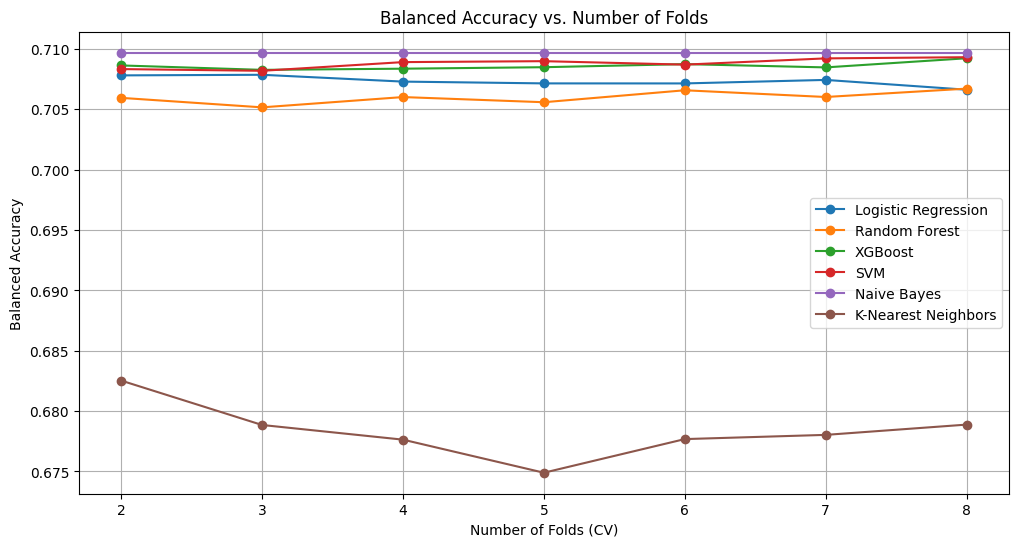

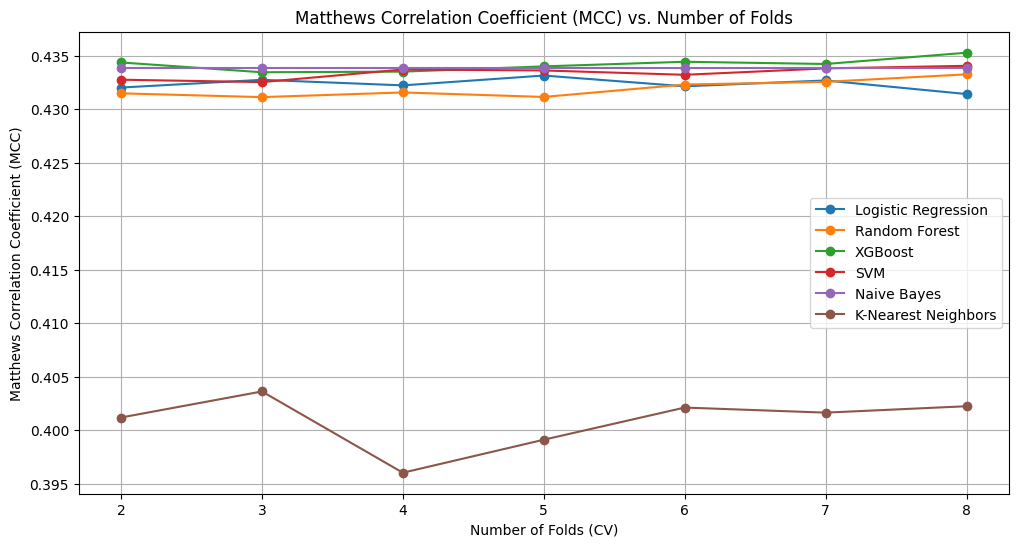

In [17]:
# generate  multiple hyperparameters simultaneously, computes accuracy, and also calculates the Matthews correlation coefficient. The hyperparameters will be tuned using Grid Search procedure with folds varying from 2 to 8. The performance of each model will later be plotted as a function of the number of folds.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warning

def grid_to_evaluate_models(X, y, cv_range=(2, 9)):
    """
    Performs Grid Search with varying folds, computes accuracy and MCC.

    Args:
        X (np.ndarray or pd.DataFrame): Feature data.
        y (np.ndarray or pd.Series): Target variable.
        cv_range (tuple): Range of folds (min, max + 1) to iterate through.

    Returns:
        dict: A dictionary where keys are model names and values are dictionaries
              containing lists for 'cv', 'mcc', and 'acc', and the 'best_estimator'.
    """
    # Define parameter grids (can be expanded) - using previously defined grids
    param_grid_lr = {'C': [0.1, 1], 'solver': ['liblinear']} # Reduced grid for speed
    param_grid_rf = {'n_estimators': [50, 100], 'max_depth': [None, 5]} # Reduced grid for speed
    param_grid_xgb = {'n_estimators': [50, 100], 'learning_rate': [0.1], 'max_depth': [3, 5]} # Reduced grid for speed
    param_grid_svc = {'C': [1], 'kernel': ['rbf'], 'gamma': ['scale']} # Reduced grid for speed
    param_grid_knn = {'n_neighbors': [5, 7], 'weights': ['uniform']} # Reduced grid for speed
    param_grid_nb = {} # Gaussian Naive Bayes has no hyperparameters to tune

    # Models and their parameter grids
    models_and_grids = {
        "Logistic Regression": (LogisticRegression(max_iter=1000), param_grid_lr),
        "Random Forest": (RandomForestClassifier(random_state=42), param_grid_rf),
        "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb),
        "SVM": (SVC(probability=True, random_state=42), param_grid_svc),
        "Naive Bayes": (GaussianNB(), param_grid_nb),
        "K-Nearest Neighbors": (KNeighborsClassifier(), param_grid_knn)
    }

    all_models_performance = {}

    print(f"Evaluating models with folds ranging from {cv_range[0]} to {cv_range[1]-1}...")

    for name, (model, param_grid) in models_and_grids.items():
        print(f"\nProcessing {name}...")
        all_models_performance[name] = {
            "cv": [],
            "mcc": [],
            "acc": [],
            "best_estimator": None # Store the best estimator from the last fold
        }

        # Iterate through different numbers of folds
        for n_folds in range(cv_range[0], cv_range[1]):
            print(f"  Using {n_folds} folds...")
            all_models_performance[name]["cv"].append(n_folds)

            # Define cross-validation strategy
            kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

            # Perform Grid Search for the current number of folds
            # Using 'roc_auc' or 'f1' is generally better for imbalanced data,
            # but the prompt asks for accuracy and MCC calculation *after* finding the best model
            # and cross_val_predict doesn't directly use grid search best parameters.
            # A common approach is to find the best parameters using GridSearchCV on the full X, y
            # and then use cross_val_predict with that best estimator for different folds.
            # However, the task specifically asks to use GridSearchCV *within* the loop of folds.
            # This implies finding the best params *for that specific number of folds*.
            # Let's stick to the prompt's implied approach. We will use 'accuracy' for scoring GridSearchCV
            # as balanced_accuracy is requested later.

            # Create a GridSearchCV object for the current model and parameter grid
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1, verbose=0) # verbose=0 to reduce output

            # Fit the GridSearchCV on the entire data to find best parameters for this n_folds
            grid_search.fit(X, y)

            # Get the best estimator found by Grid Search for this number of folds
            best_estimator = grid_search.best_estimator_

            # Store the best estimator found for the *last* number of folds
            if n_folds == cv_range[1] - 1:
                 all_models_performance[name]["best_estimator"] = best_estimator


            # Perform cross-prediction with the best estimator for this number of folds
            y_pred_cv = cross_val_predict(best_estimator, X, y, cv=kf)

            # Compute balanced accuracy and Matthews Correlation Coefficient
            balanced_acc = balanced_accuracy_score(y, y_pred_cv)
            mcc = matthews_corrcoef(y, y_pred_cv)

            all_models_performance[name]["acc"].append(balanced_acc)
            all_models_performance[name]["mcc"].append(mcc)

            # print(f"    Balanced Accuracy: {balanced_acc:.4f}")
            # print(f"    MCC: {mcc:.4f}")


    return all_models_performance

# Ensure X and y are defined from the previous data splitting cell
# Assuming 'sphus_new_Poor health' is your target variable name in df_encoded
target_column_name = 'sphus_new_Poor health'
if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
    y_all = df_encoded[target_column_name].values  # Target variable from full dataset
    X_all = df_encoded.drop(target_column_name, axis=1).values  # Features from full dataset
    print("Using full dataset (X_all, y_all) for cross-validation within grid_to_evaluate_models.")
else:
    print("df_encoded or target column not found. Please ensure previous data loading and preparation steps were successful.")
    # As a fallback, use X and y from the train/test split, though cross-validation
    # is typically done on the full dataset.
    # X_all = np.concatenate((X_train, X_test), axis=0)
    # y_all = np.concatenate((y_train, y_test), axis=0)
    # print("Using concatenated train/test data (X, y) for cross-validation.")
    # Exit or handle the error if data is not available
    # raise SystemExit("Data not available to proceed with model evaluation.")


# Run the evaluation function
if 'X_all' in globals() and 'y_all' in globals():
    cv_range_for_plotting = (2, 9) # Define cv_range here for plotting
    model_performance_results = grid_to_evaluate_models(X_all, y_all, cv_range=cv_range_for_plotting)

    # Print or display the results
    print("\nModel Performance Results across different folds:")
    for model_name, results in model_performance_results.items():
        print(f"\n--- {model_name} ---")
        results_df = pd.DataFrame({
            "Number of Folds (CV)": results["cv"],
            "Balanced Accuracy": results["acc"],
            "Matthews Correlation Coefficient (MCC)": results["mcc"]
        })
        display(results_df)
        # print("Best Estimator (from last fold):")
        # print(results["best_estimator"])


    # Plotting the performance metrics as a function of folds
    metrics_to_plot = ["Balanced Accuracy", "Matthews Correlation Coefficient (MCC)"]

    for metric_name in metrics_to_plot:
        plt.figure(figsize=(12, 6))
        for model_name, results in model_performance_results.items():
            # Ensure the metric exists in the results dictionary
            # Need to map the metric_name string to the key in the results dict ('acc' or 'mcc')
            result_key = 'acc' if metric_name == 'Balanced Accuracy' else 'mcc'
            if result_key in results:
                plt.plot(results["cv"], results[result_key], marker='o', label=model_name)

        plt.xlabel("Number of Folds (CV)")
        plt.ylabel(metric_name)
        plt.title(f"{metric_name} vs. Number of Folds")
        plt.xticks(range(cv_range_for_plotting[0], cv_range_for_plotting[1])) # Ensure x-axis ticks are integers corresponding to folds
        plt.legend()
        plt.grid(True)
        plt.show()

else:
    print("Model evaluation could not proceed because data (X_all, y_all) is not available.")

In [18]:
# Evaluate the model performance of all folds using accuracy, sensitivity, specificity, F1-score, AUROC and precision.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

# Ensure X_all and y_all are defined from the previous cell that runs grid_to_evaluate_models
# and model_performance_results is available

if 'X_all' in globals() and 'y_all' in globals() and 'model_performance_results' in globals():
    print("\nEvaluating model performance on each fold using the best estimator from the last fold:")

    all_folds_performance = {}

    for model_name, results in model_performance_results.items():
        best_estimator = results["best_estimator"]
        if best_estimator is None:
            print(f"Skipping {model_name}: No best estimator found.")
            continue

        print(f"\n--- Evaluating {model_name} ---")

        # Define the KFold strategy using the number of folds from the last run in grid_to_evaluate_models
        n_folds = results["cv"][-1] if results["cv"] else 5 # Use the last number of folds, default to 5 if none recorded
        print(f"Using {n_folds} folds for evaluation.")
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        fold_metrics = []

        # Iterate through each fold
        for fold, (train_index, val_index) in enumerate(kf.split(X_all, y_all)):
            X_train_fold, X_val_fold = X_all[train_index], X_all[val_index]
            y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

            # Train the best estimator on the training fold (or use the pre-trained best estimator if suitable)
            # Re-fitting on each fold's training data is standard practice for per-fold evaluation
            try:
                # Create a new instance of the best estimator to fit on the current fold's data
                # This ensures the evaluation is based on a model trained only on that fold's training data
                model_instance = type(best_estimator)(**best_estimator.get_params())

                # Handle XGBoost eval_metric if it was removed by get_params
                if isinstance(model_instance, XGBClassifier) and 'eval_metric' not in model_instance.get_params():
                     model_instance.set_params(eval_metric='logloss')


                model_instance.fit(X_train_fold, y_train_fold)
                y_pred_fold = model_instance.predict(X_val_fold)

                metrics_this_fold = {
                    "Fold": fold + 1,
                    "Accuracy": accuracy_score(y_val_fold, y_pred_fold),
                    "Precision": precision_score(y_val_fold, y_pred_fold, zero_division=0), # zero_division=0 handles cases where precision is undefined
                    "Recall (Sensitivity)": recall_score(y_val_fold, y_pred_fold),
                    "F1-score": f1_score(y_val_fold, y_pred_fold),
                    "Specificity": recall_score(y_val_fold, y_pred_fold, pos_label=0) # Specificity is recall for the negative class (pos_label=0 assumes 0 is the negative class)
                }

                # AUROC requires probability estimates
                if hasattr(model_instance, 'predict_proba'):
                    y_pred_proba_fold = model_instance.predict_proba(X_val_fold)[:, 1]
                    metrics_this_fold["AUROC"] = roc_auc_score(y_val_fold, y_pred_proba_fold)
                else:
                     metrics_this_fold["AUROC"] = np.nan # Not applicable

                fold_metrics.append(metrics_this_fold)

            except Exception as e:
                print(f"  Error evaluating fold {fold + 1} for {model_name}: {e}")
                # Append a row with NaNs for this fold if evaluation fails
                fold_metrics.append({
                     "Fold": fold + 1,
                    "Accuracy": np.nan,
                    "Precision": np.nan,
                    "Recall (Sensitivity)": np.nan,
                    "F1-score": np.nan,
                    "Specificity": np.nan,
                    "AUROC": np.nan
                })


        # Store the results for this model
        all_folds_performance[model_name] = pd.DataFrame(fold_metrics)

        # Display performance per fold
        print(f"Performance per fold for {model_name}:")
        display(all_folds_performance[model_name])

        # Display average performance across all folds
        print(f"\nAverage performance across {n_folds} folds for {model_name}:")
        display(all_folds_performance[model_name].mean().to_frame(name='Average Score'))

else:
    print("Required data (X_all, y_all) or model performance results not found. Please ensure preceding cells were run successfully.")




Evaluating model performance on each fold using the best estimator from the last fold:

--- Evaluating Logistic Regression ---
Using 8 folds for evaluation.
Performance per fold for Logistic Regression:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.734427   0.693560              0.571341  0.626546     0.838659   
1     2  0.724679   0.679583              0.556098  0.611670     0.832424   
2     3  0.739895   0.698690              0.585366  0.637027     0.838659   
3     4  0.742035   0.711994              0.568293  0.632079     0.853079   
4     5  0.733000   0.695030              0.562462  0.621758     0.842105   
5     6  0.728656   0.673626              0.590244  0.629184     0.817154   
6     7  0.742449   0.710825              0.572561  0.634245     0.851072   
7     8  0.741260   0.701460              0.585976  0.638538     0.840546   

      AUROC  
0  0.791631  
1  0.773167  
2  0.782109  
3  0.791374  
4  0.784026  
5  0.786029  
6  0.793587  
7  0.790619


Average performance across 8 folds for Logistic Regression:


Average Score
Fold                       4.500000
Accuracy                   0.735800
Precision                  0.695596
Recall (Sensitivity)       0.574042
F1-score                   0.628881
Specificity                0.839212
AUROC                      0.786568


--- Evaluating Random Forest ---
Using 8 folds for evaluation.
Performance per fold for Random Forest:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.734903   0.696924              0.566463  0.624958     0.842557   
1     2  0.724441   0.678016              0.558537  0.612504     0.830475   
2     3  0.739658   0.700515              0.580488  0.634878     0.841387   
3     4  0.744413   0.716475              0.570122  0.634975     0.855807   
4     5  0.732287   0.694633              0.560024  0.620108     0.842495   
5     6  0.734364   0.693847              0.570732  0.626296     0.838986   
6     7  0.742925   0.714835              0.567073  0.632438     0.855361   
7     8  0.742212   0.705015              0.582927  0.638184     0.844055   

      AUROC  
0  0.790973  
1  0.771991  
2  0.782174  
3  0.789625  
4  0.783738  
5  0.786255  
6  0.792591  
7  0.791038


Average performance across 8 folds for Random Forest:


Average Score
Fold                       4.500000
Accuracy                   0.736900
Precision                  0.700033
Recall (Sensitivity)       0.569546
F1-score                   0.628043
Specificity                0.843890
AUROC                      0.786048


--- Evaluating XGBoost ---
Using 8 folds for evaluation.
Performance per fold for XGBoost:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.735616   0.694404              0.575000  0.629086     0.838270   
1     2  0.726581   0.677536              0.570122  0.619205     0.826578   
2     3  0.739895   0.696686              0.589634  0.638705     0.835931   
3     4  0.739658   0.701702              0.578049  0.633902     0.842946   
4     5  0.733000   0.690162              0.572821  0.626041     0.835478   
5     6  0.736504   0.691643              0.585366  0.634082     0.833138   
6     7  0.744590   0.708088              0.587195  0.642000     0.845224   
7     8  0.742449   0.699356              0.595732  0.643398     0.836257   

      AUROC  
0  0.791656  
1  0.772824  
2  0.783066  
3  0.791168  
4  0.784525  
5  0.785892  
6  0.793258  
7  0.790777


Average performance across 8 folds for XGBoost:


Average Score
Fold                       4.500000
Accuracy                   0.737287
Precision                  0.694947
Recall (Sensitivity)       0.581740
F1-score                   0.633302
Specificity                0.836728
AUROC                      0.786646


--- Evaluating SVM ---
Using 8 folds for evaluation.
Performance per fold for SVM:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.734665   0.687411              0.585976  0.632653     0.829696   
1     2  0.723490   0.673203              0.565244  0.614518     0.824630   
2     3  0.739658   0.692580              0.597561  0.641571     0.830475   
3     4  0.740609   0.701987              0.581707  0.636212     0.842167   
4     5  0.732287   0.687546              0.575259  0.626410     0.832749   
5     6  0.737218   0.688779              0.595122  0.638535     0.828070   
6     7  0.743401   0.705796              0.586585  0.640693     0.843665   
7     8  0.740309   0.692686              0.600610  0.643370     0.829630   

      AUROC  
0  0.747644  
1  0.694567  
2  0.708384  
3  0.692817  
4  0.715021  
5  0.725147  
6  0.732009  
7  0.721314


Average performance across 8 folds for SVM:


Average Score
Fold                       4.500000
Accuracy                   0.736454
Precision                  0.691248
Recall (Sensitivity)       0.586008
F1-score                   0.634245
Specificity                0.832635
AUROC                      0.717113


--- Evaluating Naive Bayes ---
Using 8 folds for evaluation.
Performance per fold for Naive Bayes:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.734427   0.686386              0.587195  0.632928     0.828527   
1     2  0.724441   0.671174              0.575000  0.619376     0.819953   
2     3  0.739420   0.691819              0.598171  0.641596     0.829696   
3     4  0.739420   0.698251              0.584146  0.636122     0.838659   
4     5  0.731812   0.685466              0.577697  0.626984     0.830409   
5     6  0.736504   0.687060              0.595732  0.638145     0.826511   
6     7  0.744114   0.702878              0.595732  0.644884     0.838986   
7     8  0.739358   0.690743              0.600610  0.642531     0.828070   

      AUROC  
0  0.787026  
1  0.768143  
2  0.776722  
3  0.784345  
4  0.778866  
5  0.783893  
6  0.791467  
7  0.782496


Average performance across 8 folds for Naive Bayes:


Average Score
Fold                       4.500000
Accuracy                   0.736187
Precision                  0.689222
Recall (Sensitivity)       0.589285
F1-score                   0.635321
Specificity                0.830102
AUROC                      0.781620


--- Evaluating K-Nearest Neighbors ---
Using 8 folds for evaluation.
Performance per fold for K-Nearest Neighbors:


Fold  Accuracy  Precision  Recall (Sensitivity)  F1-score  Specificity  \
0     1  0.721113   0.717614              0.469512  0.567637     0.881917   
1     2  0.721826   0.706866              0.489634  0.578530     0.870226   
2     3  0.732763   0.742481              0.481707  0.584320     0.893219   
3     4  0.730385   0.765756              0.444512  0.562500     0.913094   
4     5  0.717784   0.718690              0.454601  0.556924     0.886160   
5     6  0.725565   0.718133              0.487805  0.580973     0.877583   
6     7  0.716528   0.723553              0.442073  0.548827     0.892008   
7     8  0.733413   0.740500              0.487195  0.587716     0.890838   

      AUROC  
0  0.748330  
1  0.751429  
2  0.742376  
3  0.759228  
4  0.748168  
5  0.742017  
6  0.735697  
7  0.761733


Average performance across 8 folds for K-Nearest Neighbors:


Average Score
Fold                       4.500000
Accuracy                   0.724922
Precision                  0.729199
Recall (Sensitivity)       0.469630
F1-score                   0.570928
Specificity                0.888131
AUROC                      0.748622

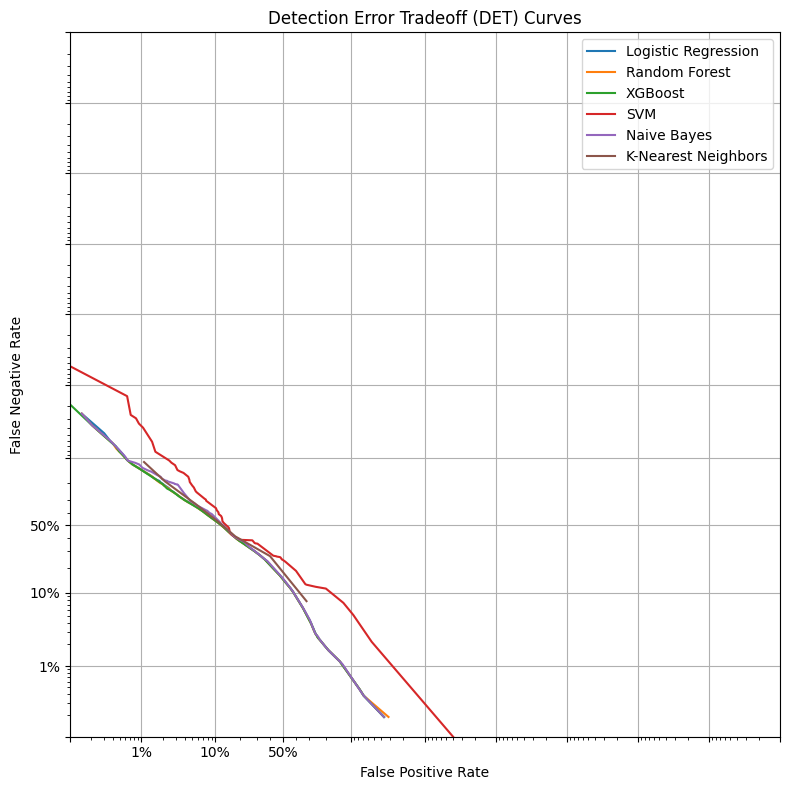

In [19]:
# prompt: generate the "Detection Error Tradeoff (DET) curves" of each model in a single plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import det_curve # Import det_curve
import matplotlib.ticker as mticker # Import mticker

def plot_det_curves(model_performance_results, X, y):
    """
    Generates and plots DET curves for each model in a single plot.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(8, 8))

    ax_det = plt.gca() # Get the current axes

    ax_det.set_xlabel('False Positive Rate')
    ax_det.set_ylabel('False Negative Rate')
    ax_det.set_title('Detection Error Tradeoff (DET) Curves')
    ax_det.grid(True)
    # Customize DET plot axes to use logit scaling, as is common
    ax_det.set_xscale('logit')
    ax_det.set_yscale('logit')
    # Optional: Custom tick formatting for logit scale
    formatter = mticker.FuncFormatter(lambda x, pos: "{:.0%}".format(x) if x in [0.01, 0.05, 0.1, 0.2, 0.5] else None)
    ax_det.xaxis.set_major_formatter(formatter)
    ax_det.yaxis.set_major_formatter(formatter)
    # Optional: Set limits to focus on relevant range
    ax_det.set_xlim([0.001, 1.0])
    ax_det.set_ylim([0.001, 1.0])


    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping DET curve plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate DET curve
            # det_curve returns false positive rate and false negative rate
            fpr_det, fnr_det, thresholds_det = det_curve(y, y_prob)

            # Plot DET curve
            ax_det.plot(fpr_det, fnr_det, label=model_name)


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping DET curve plotting.")
        except Exception as e:
            print(f"Error plotting DET curve for {model_name}: {e}")


    # Finalize plot
    ax_det.legend(loc='upper right') # DET legend is often in upper right
    plt.tight_layout()
    plt.show()

# Ensure model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_det_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot DET curves. Model performance results or data (X_all, y_all) are not available.")


Generating AUROC curves for each model (averaged across folds):
Using 8 folds to generate AUROC data.
Generating AUROC data for Logistic Regression...
Generating AUROC data for Random Forest...
Generating AUROC data for XGBoost...
Generating AUROC data for SVM...
Generating AUROC data for Naive Bayes...
Generating AUROC data for K-Nearest Neighbors...


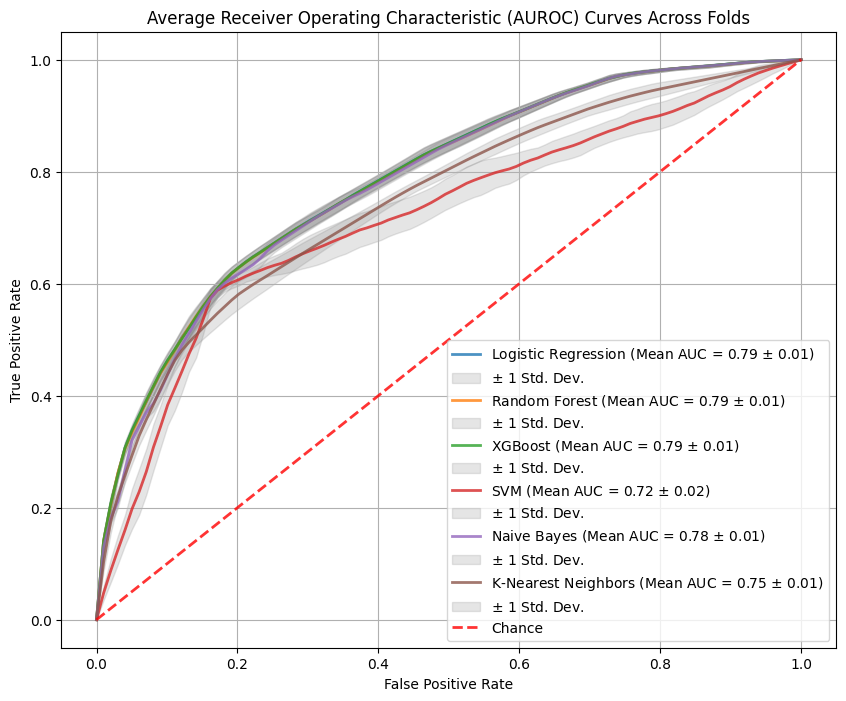

In [20]:
# plot the average auroc curve of each mdel in a single plot

import matplotlib.pyplot as plt
import numpy as np
# Prepare data for plotting AUROC curves across folds
# This requires re-running cross-validation and storing probability predictions for each fold

print("\nGenerating AUROC curves for each model (averaged across folds):")

# Define the KFold strategy (using the same number of folds as in the previous evaluation)
# Let's use 5 folds as a default if n_folds from the last evaluation isn't available
n_folds_for_auroc = model_performance_results[list(model_performance_results.keys())[0]]["cv"][-1] if model_performance_results and model_performance_results[list(model_performance_results.keys())[0]]["cv"] else 5
print(f"Using {n_folds_for_auroc} folds to generate AUROC data.")
kf_auroc = StratifiedKFold(n_splits=n_folds_for_auroc, shuffle=True, random_state=42)

plt.figure(figsize=(10, 8))

# Iterate through each model
for model_name, results in model_performance_results.items():
    best_estimator = results["best_estimator"]
    if best_estimator is None or not hasattr(best_estimator, 'predict_proba'):
        print(f"Skipping AUROC plot for {model_name}: No best estimator or does not support predict_proba.")
        continue

    print(f"Generating AUROC data for {model_name}...")

    # Lists to store FPR, TPR, and AUC for each fold
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100) # Common FPR points for interpolation

    # Iterate through each fold
    for fold, (train_index, val_index) in enumerate(kf_auroc.split(X_all, y_all)):
        X_train_fold, X_val_fold = X_all[train_index], X_all[val_index]
        y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

        try:
            # Create a new instance and fit on the current fold's training data
            model_instance = type(best_estimator)(**best_estimator.get_params())
            if isinstance(model_instance, XGBClassifier) and 'eval_metric' not in model_instance.get_params():
                 model_instance.set_params(eval_metric='logloss')

            model_instance.fit(X_train_fold, y_train_fold)

            # Get probability predictions for the validation fold
            y_proba_fold = model_instance.predict_proba(X_val_fold)[:, 1]

            # Calculate ROC curve and AUC for this fold
            fpr, tpr, _ = metrics.roc_curve(y_val_fold, y_proba_fold)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0 # Ensure curve starts at (0,0)
            tprs.append(interp_tpr)
            aucs.append(metrics.auc(fpr, tpr))

        except Exception as e:
            print(f"  Error generating AUROC for fold {fold + 1} for {model_name}: {e}")
            # If an error occurs in a fold, we might skip it or handle it depending on requirements.
            # For plotting average, it's better to try to get data from successful folds.


    if tprs: # Only plot if we successfully got data from at least one fold
        # Calculate the mean TPR and standard deviation across all folds
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0 # Ensure curve ends at (1,1)
        mean_auc = metrics.auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)

        # Plot the mean ROC curve for the model
        plt.plot(mean_fpr, mean_tpr,
                 label=f'{model_name} (Mean AUC = {mean_auc:.2f} $\pm$ {std_auc:.2f})',
                 lw=2, alpha=.8)

        # Plot the variability (e.g., standard deviation range)
        std_tpr = np.std(tprs, axis=0)
        tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
        plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                         label=f'$\pm$ 1 Std. Dev.')

    else:
        print(f"  No successful folds to plot AUROC for {model_name}.")


# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Average Receiver Operating Characteristic (AUROC) Curves Across Folds')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Confusion Matrices (Test Set):


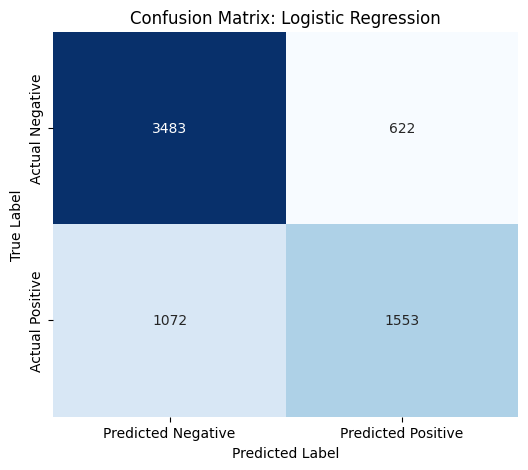

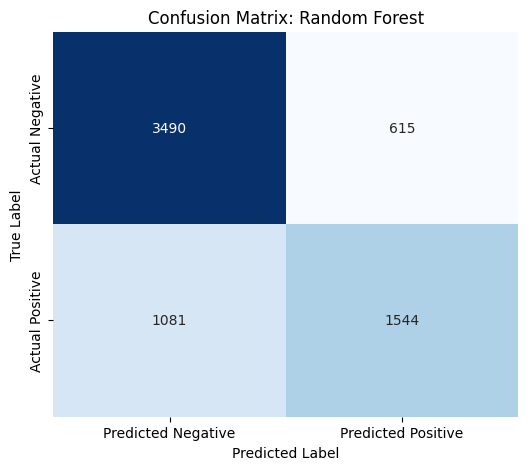

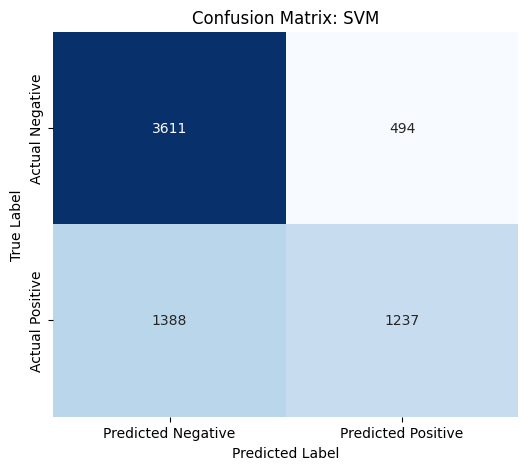

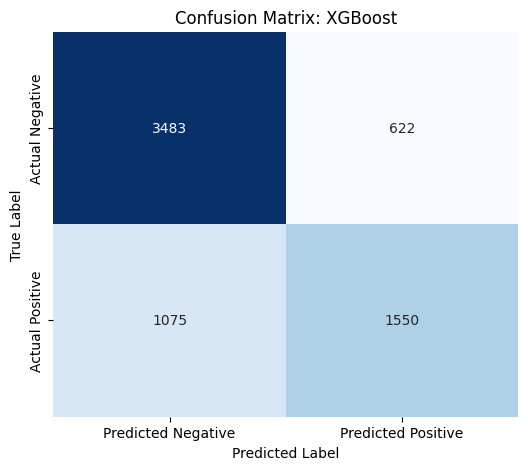

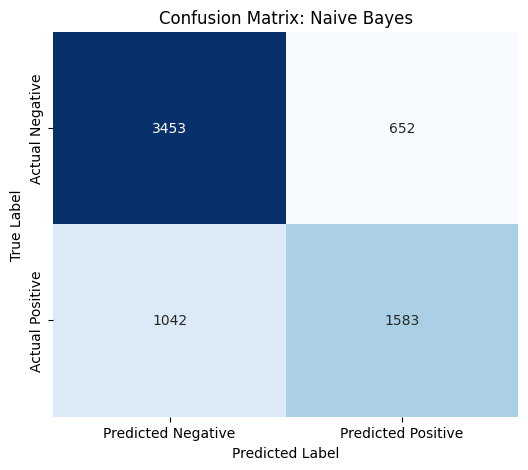

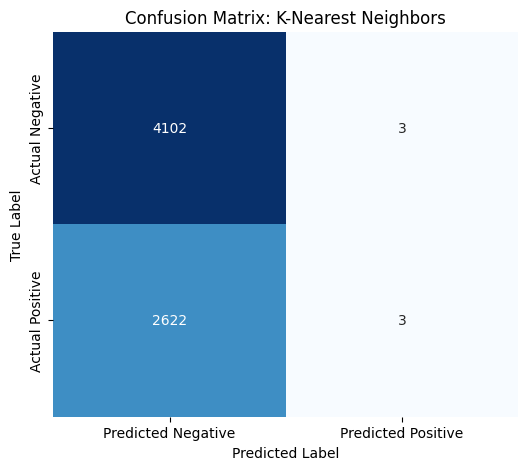


Model Performance Metrics Bar Plot (Test Set):


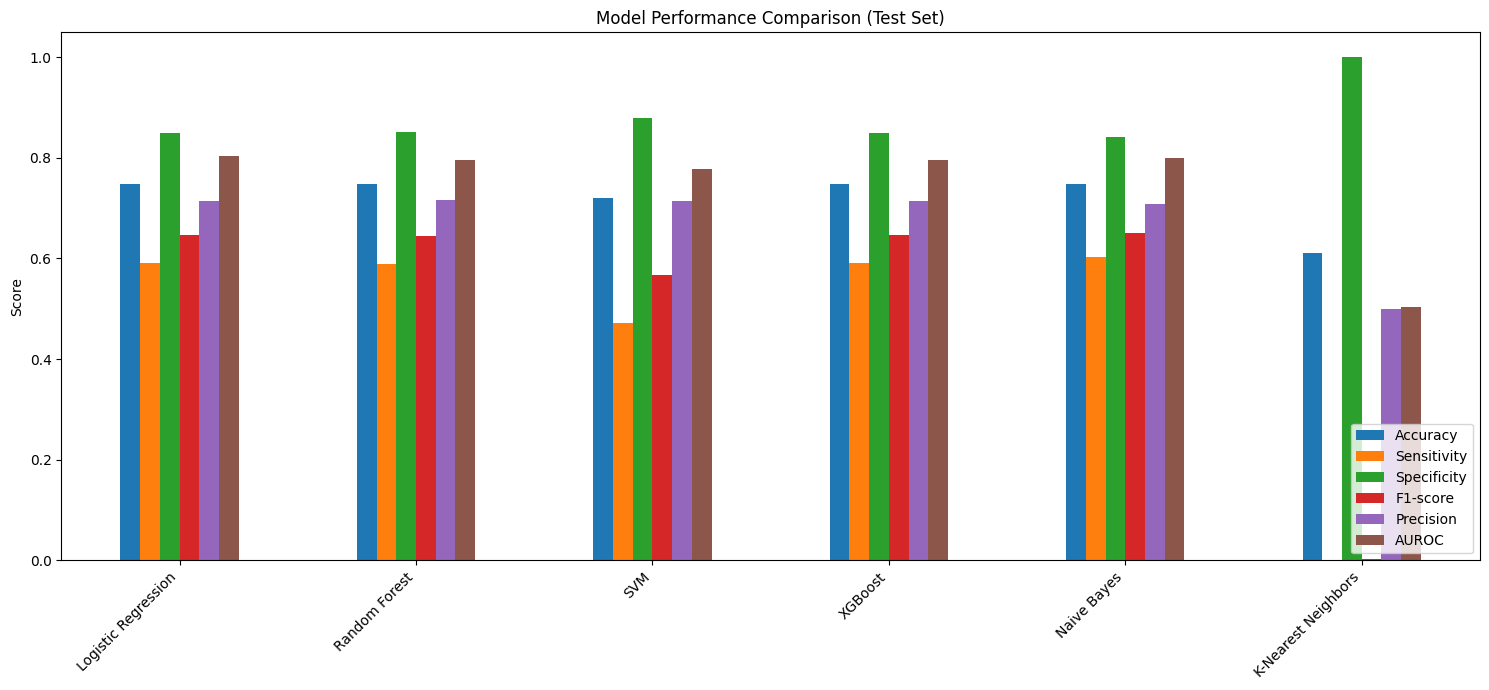


Feature Importance Bar Plots:


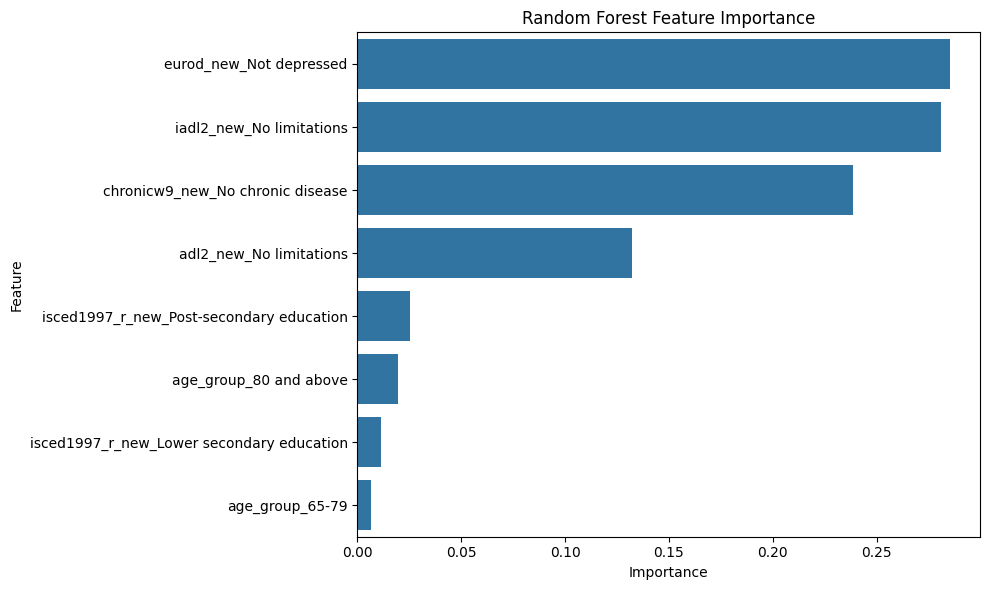

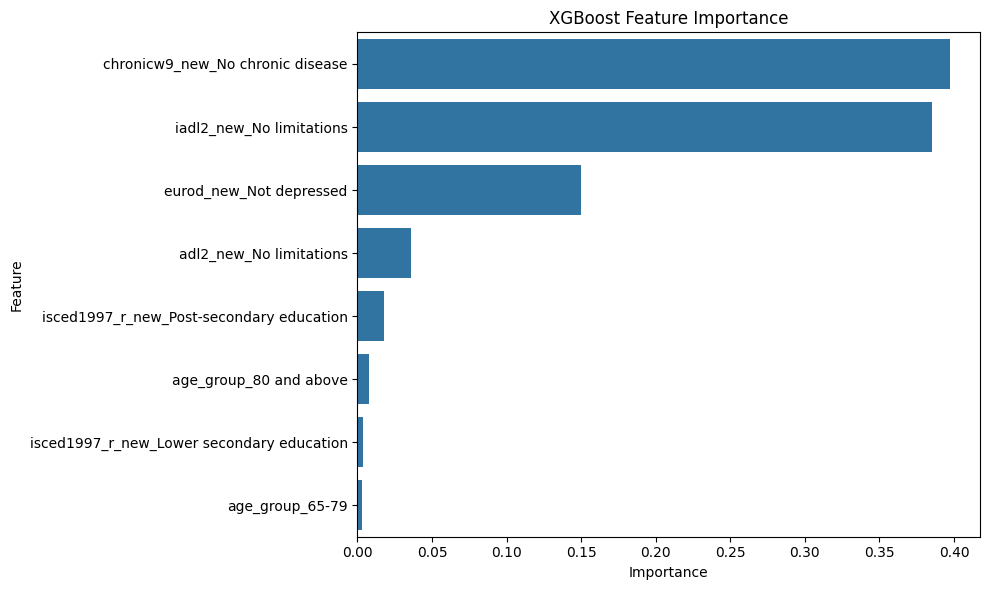

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics # Import the metrics module
import seaborn as sns # Import seaborn for heatmaps

# Plot Confusion Matrices for Test Set
print("\nConfusion Matrices (Test Set):")

for name, model in models.items():
    try:
        y_test_pred = model.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_test_pred)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=['Predicted Negative', 'Predicted Positive'],
                    yticklabels=['Actual Negative', 'Actual Positive'])
        plt.title(f'Confusion Matrix: {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    except Exception as e:
        print(f"Could not plot confusion matrix for {name}: {e}")


# Plot Bar Plot for Model Performance Metrics (Test Set)
# Re-using the test_metrics_df created in the previous evaluation cell
if 'test_metrics_df' in globals() and not test_metrics_df.empty:
    print("\nModel Performance Metrics Bar Plot (Test Set):")

    # Ensure the metrics we want to plot are in the DataFrame
    metrics_to_plot = ['Accuracy', 'Sensitivity', 'Specificity', 'F1-score', 'Precision', 'AUROC'] # Add AUROC

    # Select only the metrics we want to plot
    plot_df = test_metrics_df[metrics_to_plot].copy()

    plot_df.plot(kind='bar', figsize=(15, 7))
    plt.title('Model Performance Comparison (Test Set)')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

else:
    print("Test metrics DataFrame ('test_metrics_df') not found or is empty. Please run the model evaluation cell first.")

# Plot Bar Plot for Feature Importances (if available)
print("\nFeature Importance Bar Plots:")
# The feature importance plotting loop is already present in the previous cell.
# You can re-run that part or ensure this code block is placed after it
# if you want to generate them again here.
# Re-running the feature importance plotting logic:
if 'feature_names' in globals():
    for name, model in models.items():
        try:
            if hasattr(model, 'feature_importances_'):
                importances = model.feature_importances_
                feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
                feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

                plt.figure(figsize=(10, 6))
                sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
                plt.title(f'{name} Feature Importance')
                plt.tight_layout()
                plt.show()

            elif hasattr(model, 'coef_') and len(model.coef_.shape) == 1: # For linear models like Logistic Regression
                coefficients = model.coef_
                feature_coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
                feature_coef_df['Abs_Coefficient'] = np.abs(coefficients)
                feature_coef_df = feature_coef_df.sort_values('Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

                plt.figure(figsize=(10, 6))
                sns.barplot(x='Coefficient', y='Feature', data=feature_coef_df)
                plt.title(f'{name} Coefficients')
                plt.tight_layout()
                plt.show()

            else:
                pass # Already printed that it doesn't have the attribute

        except Exception as e:
            print(f"Could not plot feature importance for {name}: {e}")
else:
    print("Feature names ('feature_names') not available for plotting feature importance. Please run the data preparation and evaluation cells.")

Logistic Regression ROC AUC: 0.7866 (95% CI: [0.0000, 1.0000])
Random Forest ROC AUC: 0.7871 (95% CI: [0.0000, 1.0000])
XGBoost ROC AUC: 0.7871 (95% CI: [0.0000, 1.0000])
SVM ROC AUC: 0.7165 (95% CI: [0.0000, 1.0000])
Naive Bayes ROC AUC: 0.7816 (95% CI: [0.0000, 1.0000])
K-Nearest Neighbors ROC AUC: 0.7555 (95% CI: [0.0000, 1.0000])


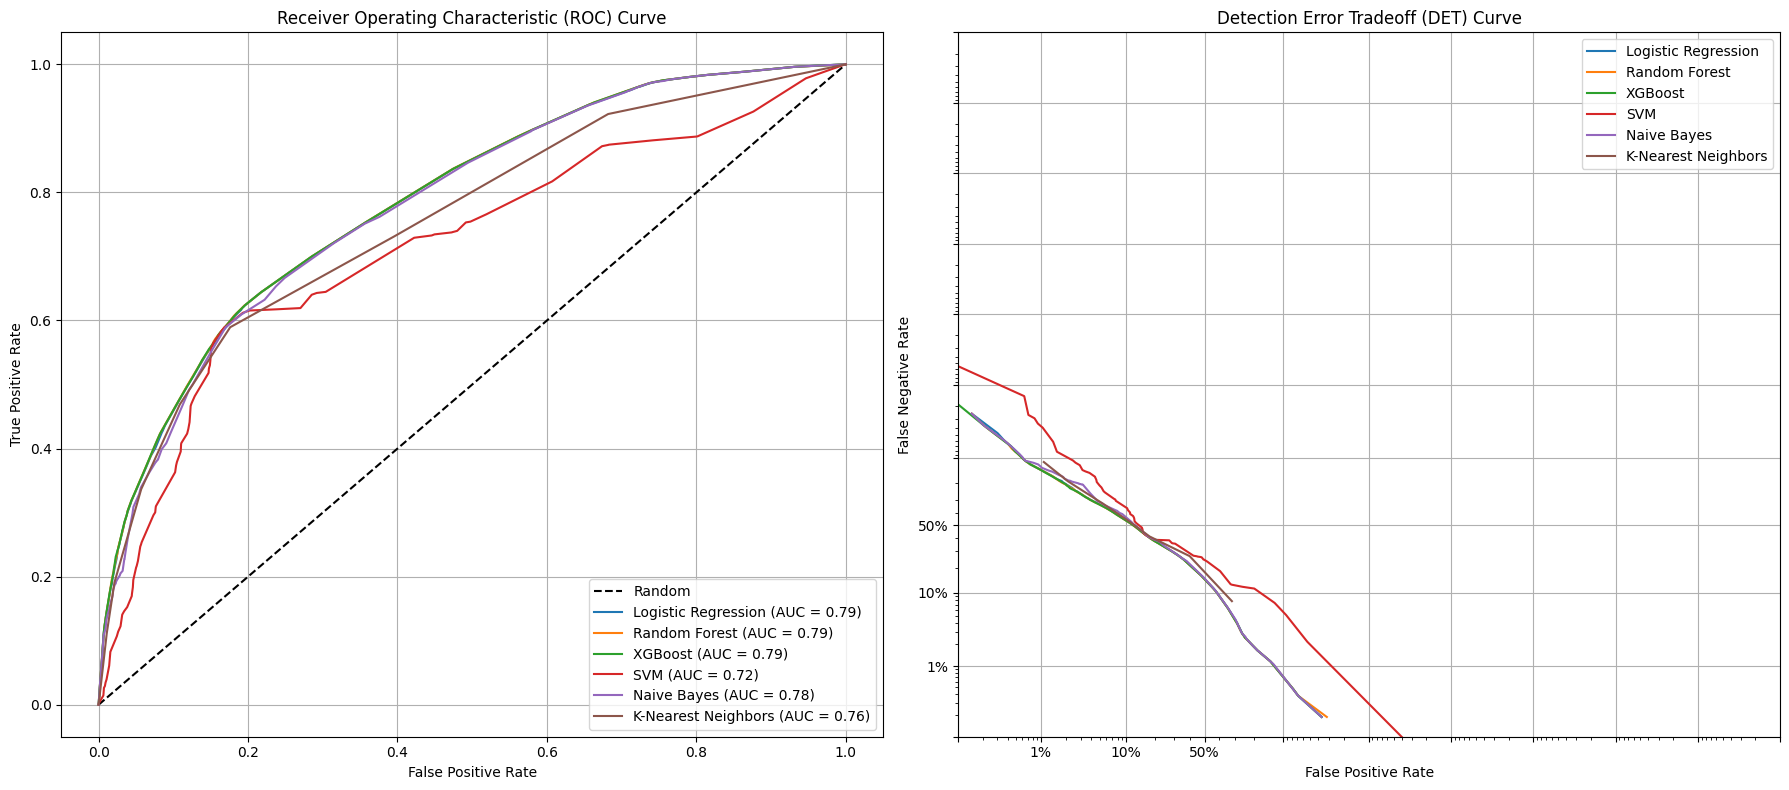

In [22]:
# for cross-validation within grid_to_evaluate_models.
# Evaluating models with folds ranging from 2 to 8.generate  multiple hyperparameters simultaneously, computes Receiver Operating Characteristic (ROC) curves(with confidence intervals), and also calculates and plot the Detection Error Tradeoff (DET) curves The hyperparameters will be tuned using Grid Search procedure with folds varying from 2 to 8. The performance of each model will later be plotted as a function of the number of folds.
# # hints : grid_to_evaluate_models function takes the input data X and y, as well as the number of folds cv
# # "cv": An empty list to store the number of folds used for each model.
# # "mcc": An empty list to store the Matthews correlation coefficient calculated for each model.
# # acc": An empty list to store the balanced accuracy calculated for each model.
# # The function then iterates over the range of folds, from 2 to cv+1. For each number of folds, the code performs the following procedure for each model:
# # Uses GridSearchCV to perform a grid search to find the best hyperparameters for the model, using the current number of folds for cross-validation.
# # Executes cross-prediction (cross_val_predict) with the best estimator found by Grid Search.
# # Stores the number of folds used, the best model found, the Matthews correlation coefficient, and the balanced accuracy in the respective fields of the all_models dictionary for the current model.
# # At the end, the function returns the all_models dictionary containing the collected information for each model evaluated with different numbers of folds.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, det_curve
from scipy.stats import t
import matplotlib.ticker as mticker

def plot_roc_det_curves(model_performance_results, X, y):
    """
    Generates and plots ROC and DET curves with confidence intervals.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(18, 8))

    # ROC Curve Plot
    ax_roc = plt.subplot(1, 2, 1)
    ax_roc.plot([0, 1], [0, 1], 'k--', label='Random') # Plot random chance line
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')
    ax_roc.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax_roc.legend(loc='lower right')
    ax_roc.grid(True)

    # DET Curve Plot
    ax_det = plt.subplot(1, 2, 2)
    ax_det.set_xlabel('False Positive Rate')
    ax_det.set_ylabel('False Negative Rate')
    ax_det.set_title('Detection Error Tradeoff (DET) Curve')
    ax_det.grid(True)
    # Customize DET plot axes to use logit scaling, as is common
    ax_det.set_xscale('logit')
    ax_det.set_yscale('logit')
    # Optional: Custom tick formatting for logit scale
    formatter = mticker.FuncFormatter(lambda x, pos: "{:.0%}".format(x) if x in [0.01, 0.05, 0.1, 0.2, 0.5] else None)
    ax_det.xaxis.set_major_formatter(formatter)
    ax_det.yaxis.set_major_formatter(formatter)
    # Optional: Set limits to focus on relevant range
    ax_det.set_xlim([0.001, 1.0])
    ax_det.set_ylim([0.001, 1.0])


    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping curve plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate ROC curve and AUC
            fpr, tpr, thresholds_roc = roc_curve(y, y_prob)
            roc_auc = auc(fpr, tpr)

            # Calculate confidence intervals for ROC AUC (using bootstrapping or DeLong's method if available)
            # A simpler approximation using standard error for demonstration:
            # This is a simplified approach and not as robust as bootstrapping or DeLong's.
            # For publication-quality CIs, consider libraries like 'scikit-plot' or 'roc-auc-plugin'.
            n_samples = len(y)
            se = np.sqrt(roc_auc * (1 - roc_auc) / n_samples) # Simplified standard error formula
            alpha = 0.95 # Confidence level
            z = t.ppf(1 + (alpha / 2), df=n_samples - 1) # Use t-distribution critical value
            lower_bound = roc_auc - z * se
            upper_bound = roc_auc + z * se
            # Clip bounds to [0, 1]
            lower_bound = max(0, lower_bound)
            upper_bound = min(1, upper_bound)

            print(f"{model_name} ROC AUC: {roc_auc:.4f} (95% CI: [{lower_bound:.4f}, {upper_bound:.4f}])")

            # Plot ROC curve
            ax_roc.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


            # Calculate DET curve
            # det_curve returns false positive rate and false negative rate
            fpr_det, fnr_det, thresholds_det = det_curve(y, y_prob)

            # Plot DET curve
            ax_det.plot(fpr_det, fnr_det, label=model_name)


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping curve plotting.")
        except Exception as e:
            print(f"Error plotting curves for {model_name}: {e}")


    # Finalize plots
    ax_roc.legend(loc='lower right')
    ax_det.legend(loc='upper right') # DET legend is often in upper right
    plt.tight_layout()
    plt.show()

# Ensure X_all and y_all are defined from previous data loading/preparation
# If not, rerun the relevant cells or define them here:
# target_column_name = 'sphus_new_Poor health' # Ensure this matches your target column name
# if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
#     y_all = df_encoded[target_column_name].values
#     X_all = df_encoded.drop(target_column_name, axis=1).values
# else:
#     print("Data (X_all, y_all) not available for plotting curves.")
#     X_all, y_all = None, None # Or handle error as appropriate

# Assuming model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_roc_det_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot ROC/DET curves. Model performance results or data (X_all, y_all) are not available.")



Precision-Recall Area Under Curve (PRAUC) with Confidence Intervals:
- Logistic Regression: PRAUC = 0.7140 (95% CI: [0.7069, 0.7229])
- Random Forest: PRAUC = 0.7151 (95% CI: [0.7082, 0.7236])
- XGBoost: PRAUC = 0.7148 (95% CI: [0.7078, 0.7236])
- SVM: PRAUC = 0.6230 (95% CI: [0.6152, 0.6334])
- Naive Bayes: PRAUC = 0.7020 (95% CI: [0.6949, 0.7119])
- K-Nearest Neighbors: PRAUC = 0.6942 (95% CI: [0.6869, 0.7028])


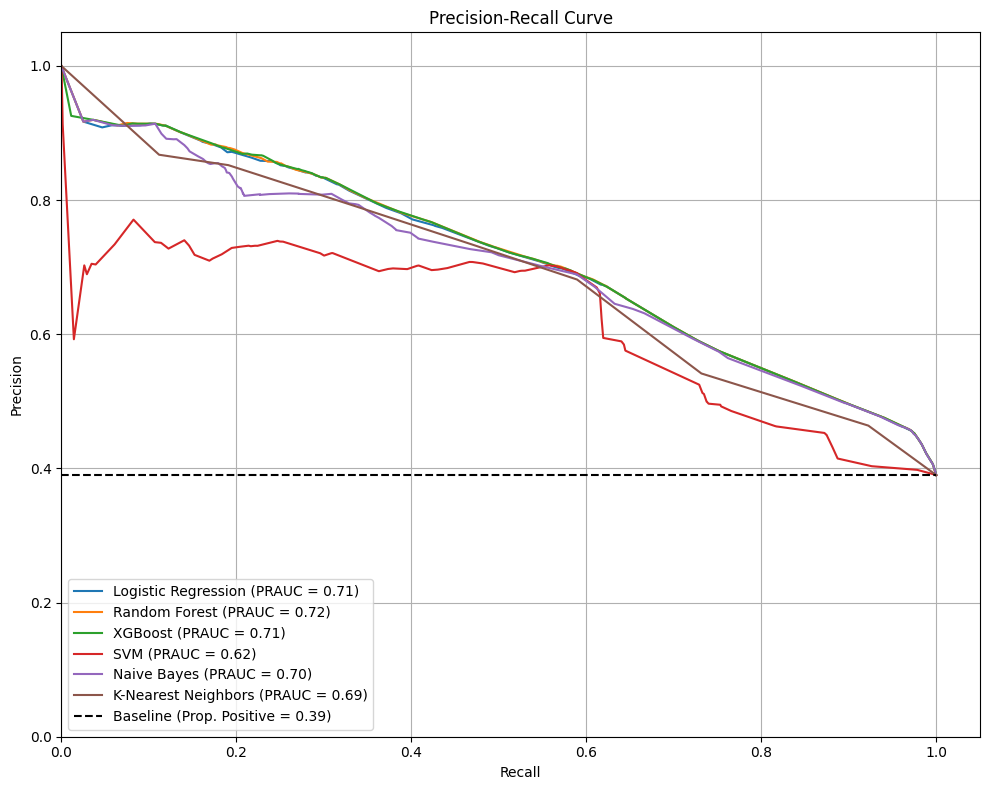

In [23]:
#  generate the PRAUC with confidence intervals and plot the precision  and recall curve for all model in a single plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.ticker as mticker

def plot_prauc_with_ci_and_curves(model_performance_results, X, y):
    """
    Generates and plots PR curves for each model in a single plot,
    calculates PRAUC with confidence intervals.

    Args:
        model_performance_results (dict): Results from grid_to_evaluate_models,
                                          including the 'best_estimator' for each model.
        X (np.ndarray or pd.DataFrame): Feature data (full dataset).
        y (np.ndarray or pd.Series): Target variable (full dataset).
    """
    plt.figure(figsize=(10, 8)) # Adjust figure size as needed
    ax_pr = plt.gca()

    ax_pr.set_xlabel('Recall')
    ax_pr.set_ylabel('Precision')
    ax_pr.set_title('Precision-Recall Curve')
    ax_pr.set_ylim([0.0, 1.05])
    ax_pr.set_xlim([0.0, 1.05])
    ax_pr.grid(True)

    print("\nPrecision-Recall Area Under Curve (PRAUC) with Confidence Intervals:")

    # To get CI for PRAUC, bootstrapping is a common method.
    # We'll perform a simplified bootstrap here for demonstration.
    n_bootstraps = 100 # Number of bootstrap samples
    rng_seed = 42 # For reproducibility

    for model_name, results in model_performance_results.items():
        best_estimator = results.get("best_estimator")
        if best_estimator is None:
            print(f"No best estimator found for {model_name}. Skipping PRAUC calculation and plotting.")
            continue

        try:
            # Get probability predictions
            y_prob = best_estimator.predict_proba(X)[:, 1]

            # Calculate PRAUC for the full data
            precision, recall, _ = precision_recall_curve(y, y_prob)
            prauc_full = auc(recall, precision)

            # Bootstrap for Confidence Interval
            bootstrapped_praucs = []
            rng = np.random.RandomState(rng_seed)
            for i in range(n_bootstraps):
                # Bootstrap resampling with replacement
                indices = rng.randint(0, len(y), len(y))
                if len(np.unique(y[indices])) < 2: # Skip if bootstrap sample doesn't have both classes
                    continue

                try:
                     precision_bs, recall_bs, _ = precision_recall_curve(y[indices], y_prob[indices])
                     prauc_bs = auc(recall_bs, precision_bs)
                     bootstrapped_praucs.append(prauc_bs)
                except Exception as e:
                    # print(f"  Error during bootstrap {i} for {model_name}: {e}")
                    pass # Silently fail bootstrap if there's an issue


            if bootstrapped_praucs:
                # Calculate confidence interval from bootstrapped PRAUCs
                alpha = 0.95
                p = ((1.0 - alpha) / 2.0) * 100
                lower = max(0.0, np.percentile(bootstrapped_praucs, p))
                p = (alpha + ((1.0 - alpha) / 2.0)) * 100
                upper = min(1.0, np.percentile(bootstrapped_praucs, p))

                print(f"- {model_name}: PRAUC = {prauc_full:.4f} (95% CI: [{lower:.4f}, {upper:.4f}])")

                # Plot PR curve
                ax_pr.plot(recall, precision, label=f'{model_name} (PRAUC = {prauc_full:.2f})')
            else:
                 print(f"- {model_name}: Could not calculate bootstrap CI for PRAUC.")
                 # Plot PR curve without CI in label
                 ax_pr.plot(recall, precision, label=f'{model_name} (PRAUC = {prauc_full:.2f})')


        except AttributeError:
            print(f"{model_name} does not have predict_proba method. Skipping PRAUC calculation and plotting.")
        except Exception as e:
            print(f"Error calculating PRAUC or plotting PR curve for {model_name}: {e}")


    # Add a diagonal line if random classifier is meaningful (though less standard for PR curves)
    # For imbalanced data, the baseline PR curve is a horizontal line at the proportion of the positive class
    positive_proportion = np.sum(y) / len(y)
    ax_pr.plot([0, 1], [positive_proportion, positive_proportion], 'k--', label=f'Baseline (Prop. Positive = {positive_proportion:.2f})')


    # Finalize plot
    ax_pr.legend(loc='lower left')
    plt.tight_layout()
    plt.show()

# Ensure model_performance_results, X_all, and y_all are available from the preceding code
if 'model_performance_results' in globals() and 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    plot_prauc_with_ci_and_curves(model_performance_results, X_all, y_all)
else:
    print("Could not plot PR curves or calculate PRAUC. Model performance results or data (X_all, y_all) are not available.")


Tuning XGBoost and evaluating with folds ranging from 2 to 8...
  Tuning with 2 folds...
    AUROC: 0.7863, MCC: 0.4340
  Tuning with 3 folds...
    AUROC: 0.7855, MCC: 0.4352
  Tuning with 4 folds...
    AUROC: 0.7857, MCC: 0.4353
  Tuning with 5 folds...
    AUROC: 0.7856, MCC: 0.4337
  Tuning with 6 folds...
    AUROC: 0.7856, MCC: 0.4355
  Tuning with 7 folds...
    AUROC: 0.7857, MCC: 0.4348
  Tuning with 8 folds...
    AUROC: 0.7856, MCC: 0.4345


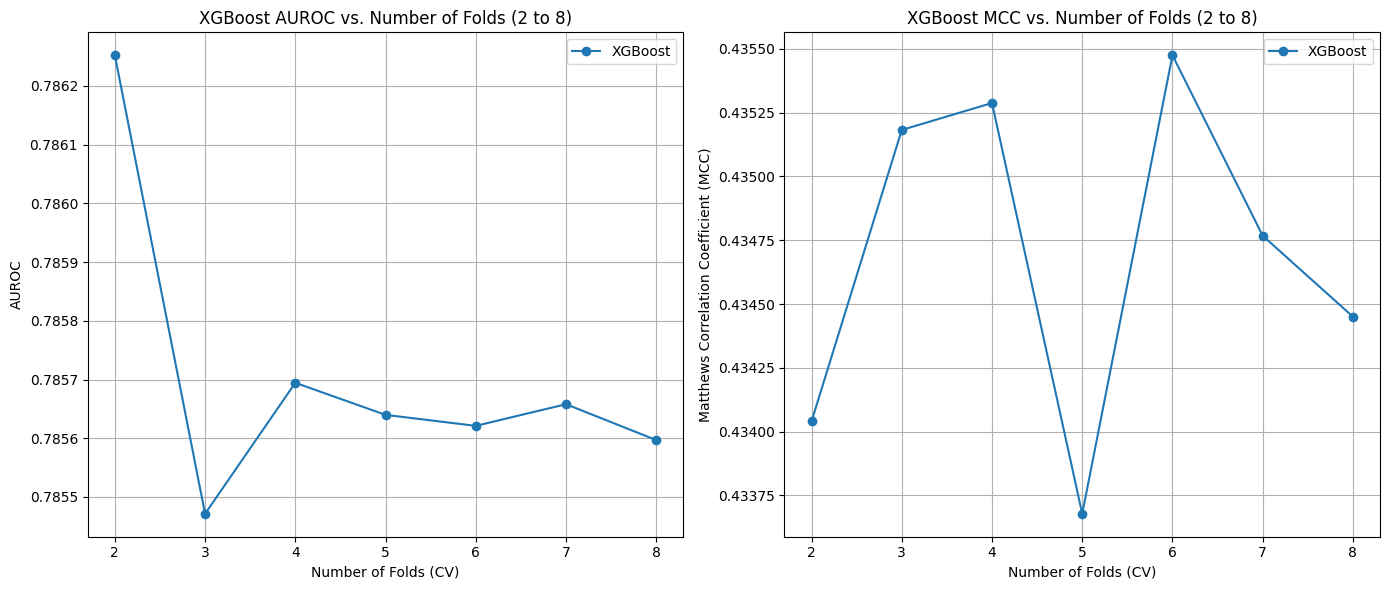

In [24]:
#hypertune only xgboost model only across the 2-8 folds and make  different plot for auroc and mcc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from scipy.stats import t
from sklearn.metrics import roc_curve, auc, det_curve, matthews_corrcoef, roc_auc_score # Import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='xgboost') # Suppress XGBoost warning

def grid_tune_xgboost_and_plot(X, y, cv_range=(2, 9)):
    """
    Performs Grid Search for XGBoost with varying folds (2-8),
    and plots AUROC and MCC as a function of the number of folds.

    Args:
        X (np.ndarray or pd.DataFrame): Feature data.
        y (np.ndarray or pd.Series): Target variable.
        cv_range (tuple): Range of folds (min, max + 1) to iterate through.
                          Defaults to (2, 9) for folds 2 through 8.
    """
    print(f"Tuning XGBoost and evaluating with folds ranging from {cv_range[0]} to {cv_range[1]-1}...")

    # Define parameter grid for XGBoost
    # Using a slightly larger grid for more meaningful tuning, but keep it reasonable for runtime
    param_grid_xgb = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    model_name = "XGBoost"
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

    xgb_performance = {
        "cv": [],
        "auroc": [],
        "mcc": []
    }

    # Iterate through different numbers of folds from 2 to 8
    for n_folds in range(cv_range[0], cv_range[1]):
        print(f"  Tuning with {n_folds} folds...")
        xgb_performance["cv"].append(n_folds)

        # Define cross-validation strategy
        kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

        # Perform Grid Search for the current number of folds, optimize for AUROC
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_xgb,
                                   cv=kf, scoring='roc_auc', n_jobs=-1, verbose=0)

        # Fit the GridSearchCV on the entire data to find best parameters for this n_folds
        grid_search.fit(X, y)

        # Get the best estimator found by Grid Search for this number of folds
        best_estimator = grid_search.best_estimator_

        # Perform cross-prediction with the best estimator for this number of folds
        # Need probability estimates for AUROC
        y_prob_cv = cross_val_predict(best_estimator, X, y, cv=kf, method='predict_proba')[:, 1]
        y_pred_cv = (y_prob_cv > 0.5).astype(int) # Convert probabilities to binary predictions for MCC

        # Compute AUROC and Matthews Correlation Coefficient
        auroc = roc_auc_score(y, y_prob_cv)
        mcc = matthews_corrcoef(y, y_pred_cv)

        xgb_performance["auroc"].append(auroc)
        xgb_performance["mcc"].append(mcc)

        print(f"    AUROC: {auroc:.4f}, MCC: {mcc:.4f}")


    # Plotting AUROC as a function of folds
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.plot(xgb_performance["cv"], xgb_performance["auroc"], marker='o', label=model_name)
    plt.xlabel("Number of Folds (CV)")
    plt.ylabel("AUROC")
    plt.title(f"{model_name} AUROC vs. Number of Folds ({cv_range[0]} to {cv_range[1]-1})")
    plt.xticks(range(cv_range[0], cv_range[1]))
    plt.legend()
    plt.grid(True)

    # Plotting MCC as a function of folds
    plt.subplot(1, 2, 2)
    plt.plot(xgb_performance["cv"], xgb_performance["mcc"], marker='o', label=model_name)
    plt.xlabel("Number of Folds (CV)")
    plt.ylabel("Matthews Correlation Coefficient (MCC)")
    plt.title(f"{model_name} MCC vs. Number of Folds ({cv_range[0]} to {cv_range[1]-1})")
    plt.xticks(range(cv_range[0], cv_range[1]))
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Ensure X_all and y_all are defined from previous data loading/preparation cells
# If not, uncomment and run the following block to define them
# target_column_name = 'sphus_new_Poor health'
# if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
#     y_all = df_encoded[target_column_name].values
#     X_all = df_encoded.drop(target_column_name, axis=1).values
# else:
#     print("df_encoded or target column not found. Please ensure previous data loading and preparation steps were successful.")
#     X_all, y_all = None, None # Set to None to avoid errors if data is missing


# Run the XGBoost tuning and plotting function
if 'X_all' in globals() and 'y_all' in globals() and X_all is not None and y_all is not None:
    # Define the range for the number of folds (2 to 8)
    cv_range_for_tuning = (2, 9) # The upper bound is exclusive, so 9 means up to 8 folds
    grid_tune_xgboost_and_plot(X_all, y_all, cv_range=cv_range_for_tuning)
else:
    print("Could not perform XGBoost tuning and plotting. Data (X_all, y_all) is not available.")


Generating SHAP Feature Importance Plots for XGBoost:


Calculating SHAP values (this may take a while)...
SHAP values calculated.
Using single output SHAP values.

Generating SHAP Summary Plot:


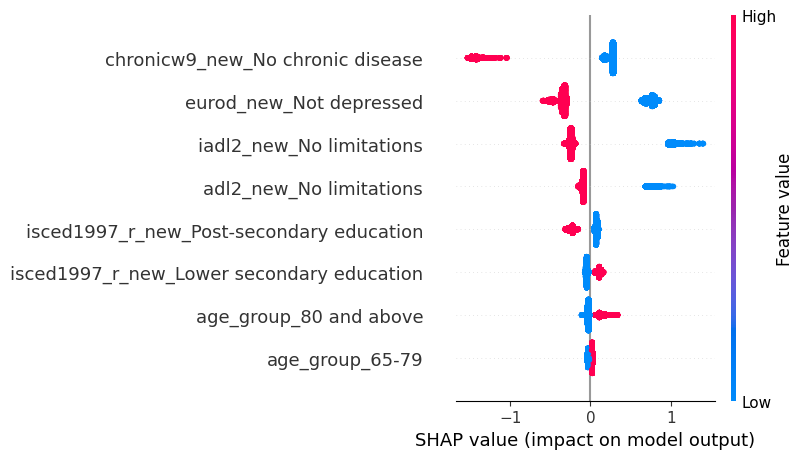


Generating SHAP Bar Plot (Average Absolute SHAP Value):


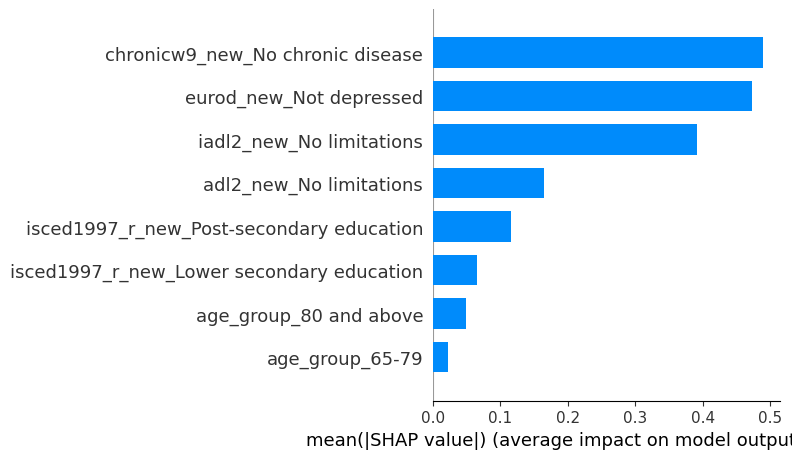

In [25]:
# Use SHAP tree explainer to plot the feature importance of the  output variables of each folds for XGboot model only

!pip install shap

import shap
import matplotlib.pyplot as plt

# Assuming 'model_performance_results' contains the 'best_estimator' for XGBoost
# from the grid search procedure and X_all, y_all are the full dataset features and target.

print("\nGenerating SHAP Feature Importance Plots for XGBoost:")

# Find the best XGBoost estimator
xgb_estimator = None
if "XGBoost" in model_performance_results and model_performance_results["XGBoost"]["best_estimator"] is not None:
    xgb_estimator = model_performance_results["XGBoost"]["best_estimator"]
else:
    print("XGBoost best estimator not found in model_performance_results. Cannot generate SHAP plots.")

# Get feature names (assuming they are available from previous steps)
# If feature_names is not defined, try to get them from the encoded DataFrame
if 'feature_names' not in globals() or feature_names is None:
    target_column_name = 'sphus_new_Poor health'
    if 'df_encoded' in globals() and target_column_name in df_encoded.columns:
        feature_names = df_encoded.drop(target_column_name, axis=1).columns.tolist()
        print("Obtained feature names from df_encoded.")
    else:
        print("Could not obtain feature names. SHAP plots might use generic names.")
        feature_names = [f'feature_{i}' for i in range(X_all.shape[1])] # Create generic names


if xgb_estimator is not None and X_all is not None and y_all is not None:
    try:
        # SHAP requires fitting the explainer on the data used for training
        # Use the full dataset X_all for the explainer, as the best_estimator was
        # likely trained on the full dataset during GridSearchCV.
        # Note: For fold-specific SHAP values, you would fit the explainer on
        # the training data of each fold and compute SHAP on the validation data of that fold.
        # The request asks for "output variables of each folds", which is a bit ambiguous
        # for feature importance, but often implies understanding influence *across* folds.
        # A common way is to explain predictions on the full dataset or a representative sample.
        # Explaining the *best* model on the full dataset is a reasonable approach here.

        # Initialize JS visualization in notebooks
        shap.initjs()

        # Create Tree Explainer
        # Using a sample of the data can speed up SHAP value calculation
        # e.g., X_sample = shap.sample(X_all, 100)
        explainer = shap.TreeExplainer(xgb_estimator)

        # Calculate SHAP values
        # This can be computationally intensive for large datasets
        # Using X_all is needed to explain the model trained on X_all/y_all
        print("Calculating SHAP values (this may take a while)...")
        shap_values = explainer.shap_values(X_all)
        print("SHAP values calculated.")

        # Check the type of shap_values (can be a list of arrays for multi-output models, or a single array)
        # For a binary classifier like XGBoost, shap_values is usually a list of two arrays [shap_values_for_class_0, shap_values_for_class_1]
        # We typically plot the SHAP values for the positive class (class 1).
        if isinstance(shap_values, list):
            # Assuming class 1 is the positive class
            shap_values_to_plot = shap_values[1]
            print("Using SHAP values for the positive class (class 1).")
        else:
            # Single output model
            shap_values_to_plot = shap_values
            print("Using single output SHAP values.")


        # Plotting Feature Importance (Summary Plot)
        print("\nGenerating SHAP Summary Plot:")
        # Passing feature names to shap.summary_plot
        # Need to ensure the features in X_all correspond to feature_names
        if len(feature_names) == shap_values_to_plot.shape[1]:
            shap.summary_plot(shap_values_to_plot, features=X_all, feature_names=feature_names)
        else:
            print("Mismatch between number of feature names and SHAP values. Plotting with generic names.")
            shap.summary_plot(shap_values_to_plot, features=X_all)
        plt.show()

        # Plotting Feature Importance (Bar Plot - Average Magnitude)
        print("\nGenerating SHAP Bar Plot (Average Absolute SHAP Value):")
        if len(feature_names) == shap_values_to_plot.shape[1]:
            shap.summary_plot(shap_values_to_plot, features=X_all, feature_names=feature_names, plot_type="bar")
        else:
            print("Mismatch between number of feature names and SHAP values. Plotting with generic names.")
            shap.summary_plot(shap_values_to_plot, features=X_all, plot_type="bar")
        plt.show()

        # Note: To show feature importance for "output variables of each folds",
        # you would need to retrain the XGBoost model for each fold, calculate SHAP values
        # on the validation set of each fold, and then visualize/aggregate those results.
        # This typically involves storing shap_values for each fold and potentially
        # averaging them or showing plots for individual folds.
        # The code above explains the 'best_estimator' model (trained potentially on the full data or the last fold's data in the grid search context)
        # on the full dataset X_all. This provides an overall feature importance view for the chosen XGBoost model.


    except Exception as e:
        print(f"An error occurred during SHAP analysis: {e}")
        print("Please check if SHAP is installed (`!pip install shap`) and if the XGBoost model is trained correctly.")


**Reasoning**:
Visualize model performance metrics and feature importances using bar plots and confusion matrices.




Generating Area Under Precision–Recall Curves (AUPRCs)...


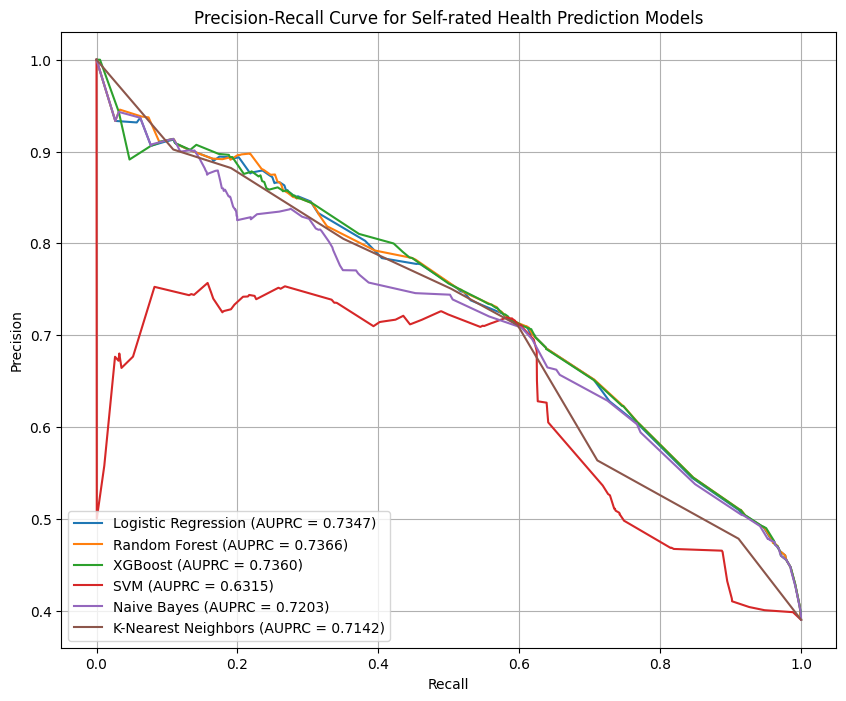


AUPRC values:


AUPRC
Random Forest        0.736624
XGBoost              0.735965
Logistic Regression  0.734734
Naive Bayes          0.720275
K-Nearest Neighbors  0.714199
SVM                  0.631509

In [26]:
# generate Area Under Precision–Recall Curves (AUPRCs) of the prediction
# models predicting self-rated health

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc

# Ensure model_performance_results, X_test, and y_test are available from previous cells

print("\nGenerating Area Under Precision–Recall Curves (AUPRCs)...")

plt.figure(figsize=(10, 8))

# Iterate through each trained model in model_performance_results
if 'model_performance_results' in globals() and 'X_test' in globals() and 'y_test' in globals():
    for name, results in model_performance_results.items():
        model = results.get("best_estimator") # Get the best estimator for each model

        if model is not None:
            # Check if the model has predict_proba method
            if hasattr(model, 'predict_proba'):
                try:
                    # Get probability estimates for the positive class (assuming positive class is 1)
                    y_prob = model.predict_proba(X_test)[:, 1]

                    # Calculate Precision-Recall curve
                    precision, recall, _ = precision_recall_curve(y_test, y_prob)

                    # Calculate Area Under the Precision-Recall Curve (AUPRC)
                    auprc = auc(recall, precision)

                    # Plot the PR curve
                    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.4f})')

                except Exception as e:
                    print(f"Could not generate PR curve for {name}: {e}")
                    plt.plot([], [], label=f'{name} (Error)') # Add a label indicating error

            else:
                print(f"Model {name} does not support probability prediction (predict_proba). Skipping PR curve.")
                plt.plot([], [], label=f'{name} (No Proba)') # Add a label indicating no probability support
        else:
            print(f"No best estimator found for {name}. Skipping PR curve.")


    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Self-rated Health Prediction Models')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

    print("\nAUPRC values:")
    # You can collect AUPRC values in a dictionary and print them
    auprc_values = {}
    for name, results in model_performance_results.items():
        model = results.get("best_estimator")
        if model is not None and hasattr(model, 'predict_proba'):
            try:
                y_prob = model.predict_proba(X_test)[:, 1]
                precision, recall, _ = precision_recall_curve(y_test, y_prob)
                auprc = auc(recall, precision)
                auprc_values[name] = auprc
            except:
                 auprc_values[name] = np.nan
        else:
            auprc_values[name] = np.nan

    auprc_df = pd.DataFrame.from_dict(auprc_values, orient='index', columns=['AUPRC'])
    display(auprc_df.sort_values('AUPRC', ascending=False))

else:
    print("Required data (model_performance_results, X_test, y_test) not found.")


Generating Precision-Recall Curve for XGBoost...
Using the best XGBoost model from the grid search results.


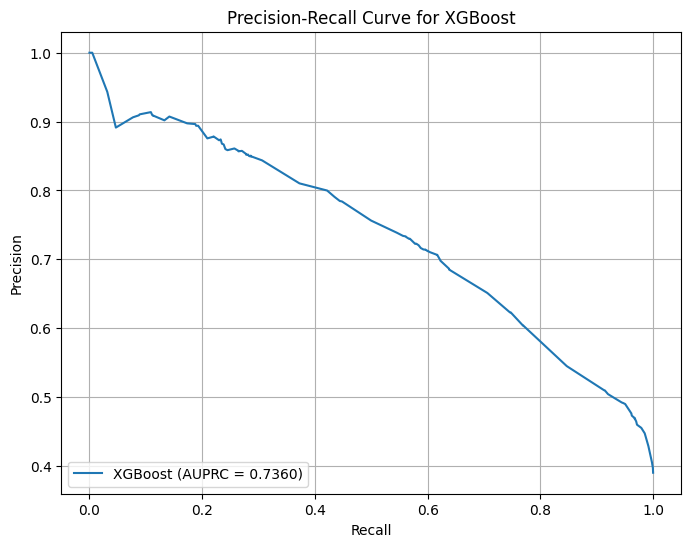


XGBoost AUPRC: 0.7360


In [27]:
#plot the precision and recall curve for xgboost in a single plot

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Ensure X_test and y_test are available from previous data splitting
# Assuming X_test and y_test are defined and contain the test features and target labels

print("\nGenerating Precision-Recall Curve for XGBoost...")

# Find the trained XGBoost model from the 'models' dictionary
# Or, use the 'best_estimator' from the grid search results if preferred (as used in AUPRC plot)
xgb_model = None
if 'model_performance_results' in globals() and "XGBoost" in model_performance_results and model_performance_results["XGBoost"]["best_estimator"] is not None:
    xgb_model = model_performance_results["XGBoost"]["best_estimator"]
    print("Using the best XGBoost model from the grid search results.")
elif "XGBoost" in models: # Fallback to the 'models' dictionary if grid search results not available
    xgb_model = models["XGBoost"]
    print("Using the XGBoost model trained on the initial train/test split.")
else:
    print("XGBoost model not found. Cannot generate Precision-Recall curve.")


if xgb_model is not None and 'X_test' in globals() and 'y_test' in globals():
    # Check if the model has predict_proba method (required for PR curve)
    if hasattr(xgb_model, 'predict_proba'):
        try:
            # Get probability estimates for the positive class (assuming positive class is 1)
            y_prob = xgb_model.predict_proba(X_test)[:, 1]

            # Calculate Precision-Recall curve
            precision, recall, _ = precision_recall_curve(y_test, y_prob)

            # Calculate Area Under the Precision-Recall Curve (AUPRC)
            auprc = auc(recall, precision)

            # Plot the Precision-Recall curve
            plt.figure(figsize=(8, 6))
            plt.plot(recall, precision, label=f'XGBoost (AUPRC = {auprc:.4f})')

            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve for XGBoost')
            plt.legend(loc='lower left')
            plt.grid(True)
            plt.show()

            print(f"\nXGBoost AUPRC: {auprc:.4f}")

        except Exception as e:
            print(f"An error occurred while generating the PR curve for XGBoost: {e}")

    else:
        print("XGBoost model does not support probability prediction (predict_proba). Cannot generate PR curve.")
else:
    print("XGBoost model or test data (X_test, y_test) not available for generating PR curve.")